In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

## Data Importing

In [2]:
data = pd.read_csv('Leads.csv')

## Data Understanding

In [3]:
#Top 5 rows of data

data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Number of rows and columns data has

data.shape

(9240, 37)

In [5]:
## let's look at the statistical aspects of the dataframe

data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


     - Some variable has missing data.
     - Some variables have high data variablity

In [6]:
# Let's see the type of each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Data Validations

### Data Value Count Check

In [7]:
# Checking the value_counts in every variables to understand the data better

#Create a copy of ca dataframe, without the first two unique value columns, 
#as this will have unique values, and donot make sense to do a value count on it.

data_dummy=data.iloc[:,2:]


for col in data_dummy:
    print(data_dummy[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
blog                    1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5

    -From the above value_counts, we could see that the below variables has highly IMBALANCED data.
    -So these will not significantly contribute to our model results.
    -Hence we will tag them to be dropped. Those are below columns:
        -Magazine 
        -Newspaper Article 
        -X Education Forums 
        -Newspaper 
        -Digital Advertisement 
        -Through Recommendations 
        -Receive More Updates About Our Courses 
        -Update me on Supply Chain Content 
        -Get updates on DM Content 
        -I agree to pay the amount through cheque 
        -What matters most to you in choosing a course 
        -Search 
        -Do Not Call 
        -Do Not Email 
        -Country 
        -What is your current occupation

In [8]:
to_drop_list = ['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque', 'Do Not Call', 'Do Not Email','Search', 
                'What matters most to you in choosing a course','Country','What is your current occupation']


to_drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation']

### Checking the 'Prospect ID' & 'Lead Number' variables

In [9]:
# Checking if this is a unique ID with no duplicates

data.duplicated(subset = 'Prospect ID').sum()

0

In [10]:
# Checking if this is a unique ID with no duplicates

data.duplicated(subset = 'Lead Number').sum()

0

    -'Prospect ID','Lead Number' seems to be purely unique ID's,and will not make any significant contributions to our model results.
    -Hence we will add them to the 'to_drop_list'.

In [11]:
#Adding the variables to to_drop_list

to_drop_list.append('Prospect ID')
to_drop_list.append('Lead Number')
to_drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation',
 'Prospect ID',
 'Lead Number']

# Exploratory Data Analysis

### Data Imbalance Percentage Check

In [12]:
# Calculating % of of Non Converted and Converted Leads in the Dataset

round(100*data['Converted'].value_counts(normalize=True),3).sort_values(ascending = False)

0    61.461
1    38.539
Name: Converted, dtype: float64

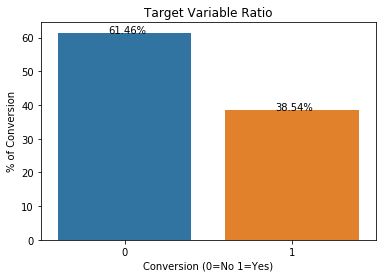

In [13]:
# Plot representing the Imbalance Percentage in lead DataFrame

ax = sns.barplot(x="Converted", y="Converted",
                 data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

#round(lead['Converted'].value_counts(normalize=True),3).sort_values(ascending = False).plot(kind='bar')
plt.title('Target Variable Ratio')
plt.xlabel('Conversion (0=No 1=Yes)')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')
plt.show()

    -Our Target variable is having a 62:38 ratio, and seems to be properly balanced with respect to the conversion ratio

## Data Cleaning & Treatment

### Handling 'Select' values in the data

    -During initial analysis (value_counts) , we could see that there are many variables having 'Select' as the categorical values.
    -These are values that customer has clearly missed to add, so we will consider them as NULL values.
    -We will convert all 'Select' to 'NaN'

In [14]:
#Checking unique value counts of City columns

data.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [15]:
#Checking unique value counts of Specialization columns

data.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
#Checking unique value counts of 'How did you hear about X Education' columns

data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [17]:
# Replace the 'Select with NaN'

data = data.replace('Select', np.nan)

### Checking unique value counts of City, Specialization and How did you hear about X Education columns after removing 'Select' values

In [18]:
data.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
data.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [20]:
data['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

    -All the 'Select' values are now replaced.

## Check the NULL Values

In [21]:
#checking percentage of null values in each columns

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [22]:
#dropping cols with more than 40% missing values because a column for this dataset,
#having more than 40% null values might mislead to the desired output.

cols=data.columns

for i in cols:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 40):
        data.drop(i, 1, inplace = True)

In [23]:
#checking null values percentage

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Exploring Categorical Variables

In [24]:
#Checking overall columns list to analyse

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   5860 

In [25]:
#Checking to drop list, as we donot want to analyse these columns

to_drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation',
 'Prospect ID',
 'Lead Number']

### Handling 'Lead Origin' column

In [26]:
# Checking unique value counts 

data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

### Univariate and Bivariate Analysis of 'Lead Origin' column

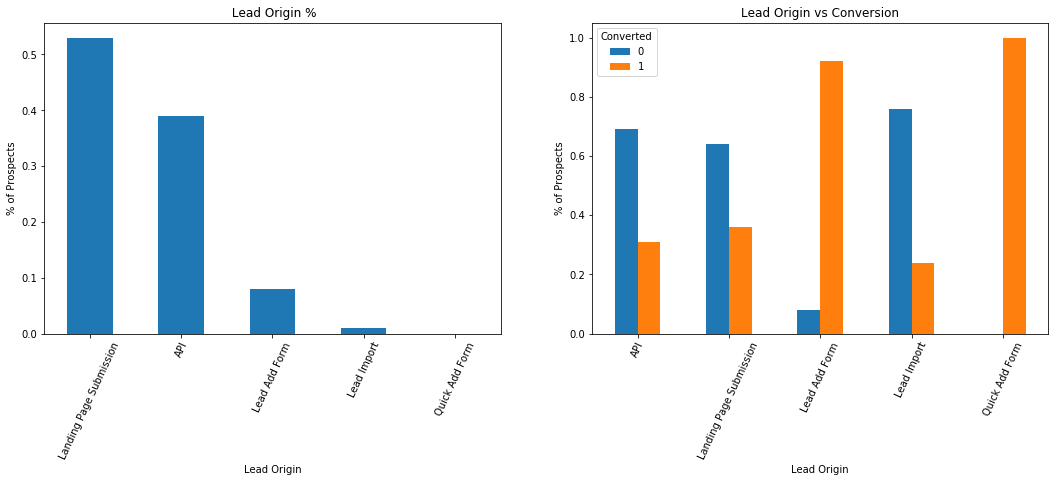

In [27]:
# Plotting w.r.t self as well as target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Lead Origin'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Origin %')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Lead Origin'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Lead Origin vs Conversion')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [28]:
# Checking unique value counts 

round(data['Lead Origin'].value_counts(normalize=True),3)

Landing Page Submission    0.529
API                        0.387
Lead Add Form              0.078
Lead Import                0.006
Quick Add Form             0.000
Name: Lead Origin, dtype: float64

In [29]:
print("____________________________________")

print("Lead Origin v/s Convertion %")
print("____________________________________")
print(round(pd.crosstab(data['Lead Origin'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("____________________________________")


____________________________________
Lead Origin v/s Convertion %
____________________________________
Converted                   0     1
Lead Origin                        
API                      0.69  0.31
Landing Page Submission  0.64  0.36
Lead Add Form            0.08  0.92
Lead Import              0.76  0.24
Quick Add Form           0.00  1.00
____________________________________


    -Univariate Analysis states that ~53% of the Lead Origin is from 'Landing Page Submission' followed by ~39% from API.
    - Bivariate Analysis states that 'Landing Page Submission' has 36% of Conversion and 'API' has 31% of Conversion.
    -All calculations are as shown above.

### Handling 'Lead Source' column

In [30]:
# Checking unique value counts 

data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
blog                    1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

    -Merging less frequent values of 'Lead Source' to 'Others' category.
    -Looking at the proportions of various values in 'Lead Source',we could see there are some low frequent values in there.
    -We will merge them into a new category 'Others'
    -We will also merge 'google' to 'Google' as this seems like a typo error.
    -Earlier from our Null value check, we noted that 'Lead Source' has 36 NULL values.
    -We will impute the NULL values with the MODE imputation, in this case 'Google'.

In [31]:
# Merging 2 Google into one category
data['Lead Source'] = data['Lead Source'].replace('google', 'Google')


# Imputing Null with Others, as it is generally Unknown sources
data['Lead Source'] = data['Lead Source'].replace(np.nan, 'Google')

# Merging low frequency items to Others
data['Lead Source'] = data['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

In [32]:
# Checking unique value counts 

data['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                78
Name: Lead Source, dtype: int64

### Univariate and Bivariate Analysis of 'Lead Source' column

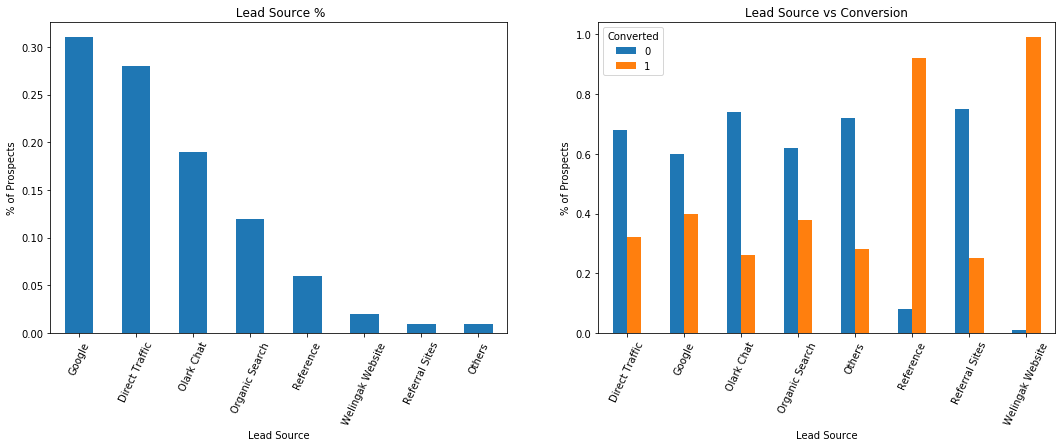

In [33]:
# Plotting vs self and target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Lead Source'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Source %')
plt.xlabel('Lead Source')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Lead Source'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Lead Source vs Conversion')
plt.xlabel('Lead Source')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [34]:
# Checking unique value counts 

round(data['Lead Source'].value_counts(normalize=True),3).sort_values(ascending = False)

Google              0.315
Direct Traffic      0.275
Olark Chat          0.190
Organic Search      0.125
Reference           0.058
Welingak Website    0.015
Referral Sites      0.014
Others              0.008
Name: Lead Source, dtype: float64

In [35]:
print("_________________________________")

print("Lead Source v/s Convertion %")
print("_________________________________")
print(round(pd.crosstab(data['Lead Source'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("_________________________________")

_________________________________
Lead Source v/s Convertion %
_________________________________
Converted            0     1
Lead Source                 
Direct Traffic    0.68  0.32
Google            0.60  0.40
Olark Chat        0.74  0.26
Organic Search    0.62  0.38
Others            0.72  0.28
Reference         0.08  0.92
Referral Sites    0.75  0.25
Welingak Website  0.01  0.99
_________________________________


    -Univariate Analysis states that ~31% of the Lead Source is from 'GOogle' followed by ~28% from 'Direct Traffic'.
    - Bivariate Analysis states that the value 'Google' as a Lead Source has 40% of Conversion and 'Direct Traffic' has 32% of Conversion.
    -All calculations are as shown above.

### Handling 'Last Activity' column

In [36]:
# Checking unique value counts 

data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

    -Merging less frequent values of 'Last Activity' to 'Others' category.
    -Looking at the proportions of various values in 'Last Activity',we could see there are couple of low frequent values in there.
    -We will merge them into a new category 'Others'.
    -Earlier from our Null value check, we noted that 'Last Activity' has 103 NULL values.
    -We will impute the NULL values with the MODE imputation, in this case 'Email Opened'.

In [37]:
# Imputing Null with Others, as it is generally Unknown sources
data['Last Activity'] = data['Last Activity'].replace(np.nan, 'Email Opened')

# Merging low frequency items to Others
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

In [38]:
# Checking unique value counts 

data['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

### Univariate and Bivariate Analysis of 'Last Activity' column

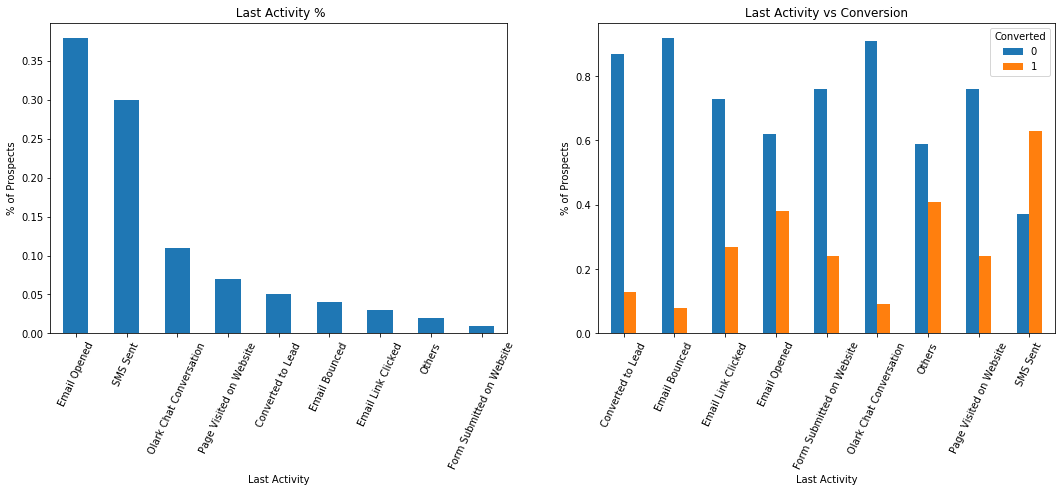

In [39]:
# Plotting analysis of variable with self and target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Last Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Last Activity %')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Last Activity'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Activity vs Conversion')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [40]:
# Checking unique value counts 

round(data['Last Activity'].value_counts(normalize=True),3).sort_values(ascending = False)

Email Opened                 0.383
SMS Sent                     0.297
Olark Chat Conversation      0.105
Page Visited on Website      0.069
Converted to Lead            0.046
Email Bounced                0.035
Email Link Clicked           0.029
Others                       0.022
Form Submitted on Website    0.013
Name: Last Activity, dtype: float64

In [41]:
print("_______________________________________")

print("Last Activity v/s Convertion %")
print("_______________________________________")
print(round(pd.crosstab(data['Last Activity'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("_______________________________________")

_______________________________________
Last Activity v/s Convertion %
_______________________________________
Converted                     0     1
Last Activity                        
Converted to Lead          0.87  0.13
Email Bounced              0.92  0.08
Email Link Clicked         0.73  0.27
Email Opened               0.62  0.38
Form Submitted on Website  0.76  0.24
Olark Chat Conversation    0.91  0.09
Others                     0.59  0.41
Page Visited on Website    0.76  0.24
SMS Sent                   0.37  0.63
_______________________________________


    -Univariate Analysis states that ~38% of the Last Activity is from 'Email Opened' followed by ~28% from 'SMS Sent'.
    - Bivariate  Analysis states  that the value 'Email Opened' as a Last Activity has 38% of Conversion and 'SMS Sent' has 63% of Conversion.
    -All calculations are as shown above.

### Handling 'Specialization' column

In [42]:
# Checking unique value counts 

data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

    -Merging less frequent values of 'Specialization' to 'Others' category.
    -Looking at the proportions of various values in 'Specialization',we could see there are a couple of low frequent values in there.
    -We will merge them into a new category 'Others'.
    -Earlier from our Null value check, we noted that 'Specialization' has 3380 NULL values.
    -We will impute the NULL values as 'Others' as not selecting a Specialization could mean that he or she has not  worked in any industry earlier.
    -So we will categorise them into Others.

In [43]:
# Imputing Null with Others, as it is generally Unknown sources
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

# Merging low frequency items to Others
data['Specialization'] = data['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

In [44]:
# Checking unique value counts 

data['Specialization'].value_counts()

Others                               3550
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

### Univariate and Bivariate Analysis of 'Specialization' column

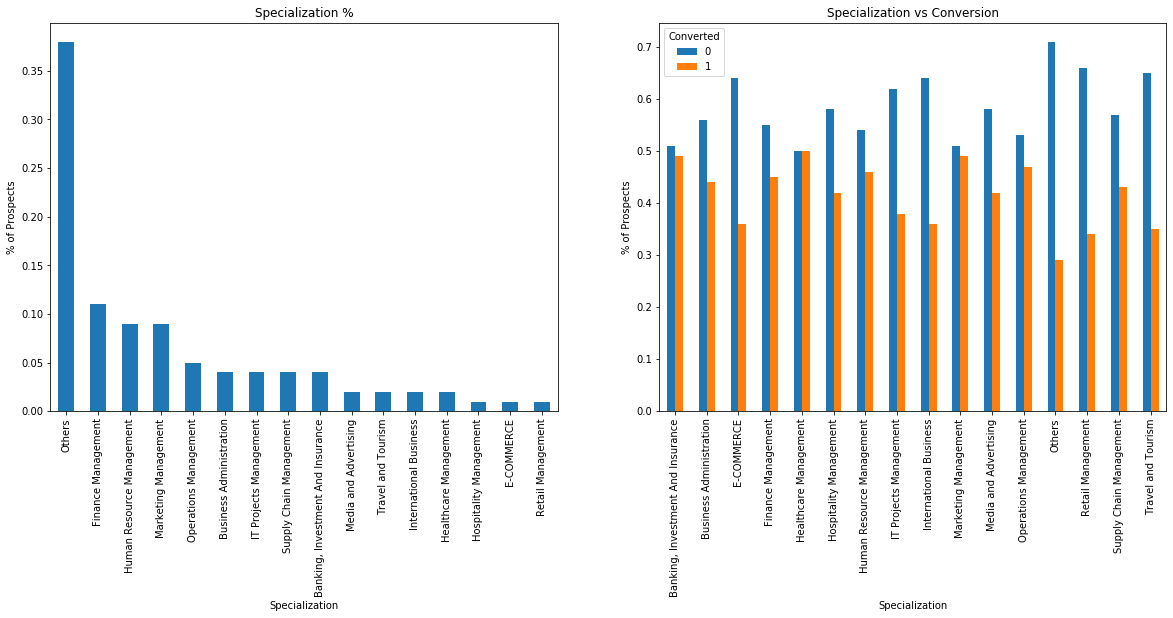

In [45]:
# Plotting Specialization w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Specialization'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Specialization %')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Specialization'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Specialization vs Conversion')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [46]:
# Checking unique value counts 

round(data['Specialization'].value_counts(normalize=True),3).sort_values(ascending = False)

Others                               0.384
Finance Management                   0.106
Human Resource Management            0.092
Marketing Management                 0.091
Operations Management                0.054
Business Administration              0.044
IT Projects Management               0.040
Supply Chain Management              0.038
Banking, Investment And Insurance    0.037
Travel and Tourism                   0.022
Media and Advertising                0.022
International Business               0.019
Healthcare Management                0.017
E-COMMERCE                           0.012
Hospitality Management               0.012
Retail Management                    0.011
Name: Specialization, dtype: float64

In [47]:
print("_______________________________________________")

print("Specialization v/s Conversion %")
print("_______________________________________________")
print(round(pd.crosstab(data['Specialization'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("_______________________________________________")

_______________________________________________
Specialization v/s Conversion %
_______________________________________________
Converted                             0     1
Specialization                               
Banking, Investment And Insurance  0.51  0.49
Business Administration            0.56  0.44
E-COMMERCE                         0.64  0.36
Finance Management                 0.55  0.45
Healthcare Management              0.50  0.50
Hospitality Management             0.58  0.42
Human Resource Management          0.54  0.46
IT Projects Management             0.62  0.38
International Business             0.64  0.36
Marketing Management               0.51  0.49
Media and Advertising              0.58  0.42
Operations Management              0.53  0.47
Others                             0.71  0.29
Retail Management                  0.66  0.34
Supply Chain Management            0.57  0.43
Travel and Tourism                 0.65  0.35
____________________________________________

    -Univariate Analysis states that ~40% of the Specialization is from  'Others' category, followed by  ~10% from 'Finance Management'.
    - Bivariate  Analysis states  that 'Finance Management'  as a Specialization has 45%  of Conversion and 'Human Resource Management' has 46% of Conversion.
    -All calculations are as shown above.

### Handling 'Tags' column

In [48]:
# Checking unique value counts 

data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

    -Merging less frequent values of 'Tags' to 'Others' category.
    -Looking at the proportions of various values in 'Tags',we could see there are couple of low frequent values in there.
    -We will merge them into a new category 'Others'.
    -Earlier from our Null value check, we noted that 'Tags' has 3353 NULL values.
    -We  will impute the NULL values  with MODE , in this case as 'Unemployed'. As not  selecting  a  'What is your current occupation' could mean that he or she was Unemployed.
    -So we will categorise them into Unemployed.

In [49]:
# Imputing Null with Others, as it is generally Unknown sources
data['Tags'] = data['Tags'].replace(np.nan, 'Others')

# Merging low frequency items to Others
data['Tags'] = data['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

In [50]:
# Checking unique value counts 

data['Tags'].value_counts()

Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

### Univariate and Bivariate Analysis of 'Tags' column

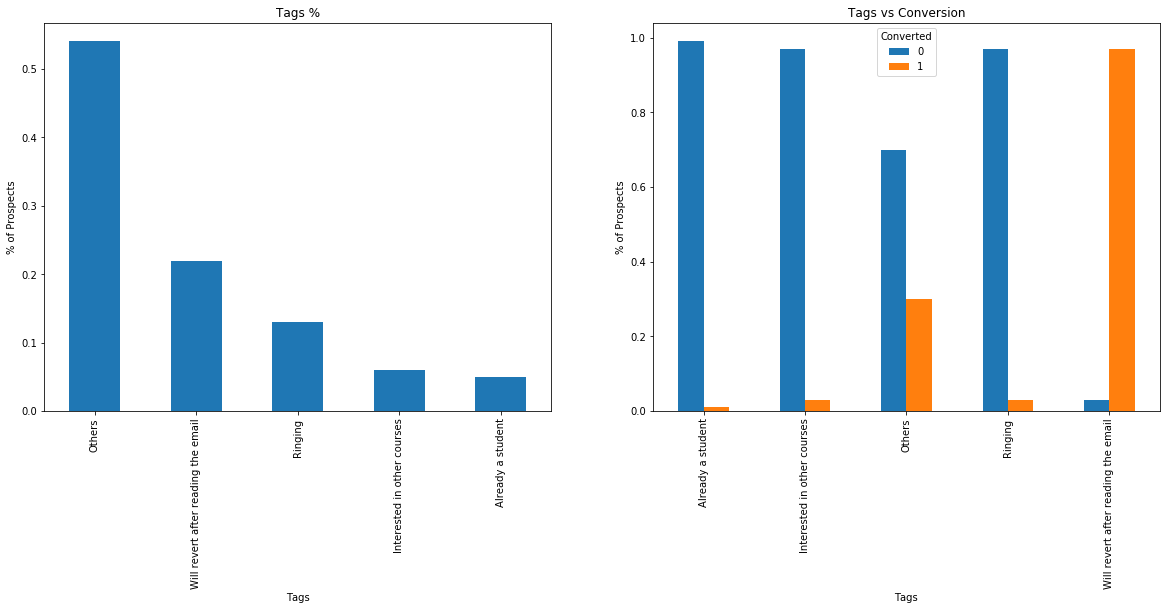

In [51]:
#Plotiing variable w.r.t self and w.r.t target

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Tags'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Tags %')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Tags'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Tags vs Conversion')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [52]:
round(data['Tags'].value_counts(normalize=True),3).sort_values(ascending = False)

Others                                 0.540
Will revert after reading the email    0.224
Ringing                                0.130
Interested in other courses            0.056
Already a student                      0.050
Name: Tags, dtype: float64

In [53]:
print("________________________________________________")

print("Specialization v/s Conversion %")
print("________________________________________________")
print(round(pd.crosstab(data['Tags'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("________________________________________________")

________________________________________________
Specialization v/s Conversion %
________________________________________________
Converted                               0     1
Tags                                           
Already a student                    0.99  0.01
Interested in other courses          0.97  0.03
Others                               0.70  0.30
Ringing                              0.97  0.03
Will revert after reading the email  0.03  0.97
________________________________________________


    -Univariate Analysis states that ~54% of the Tags is from 'Others' category, followed by ~22%  from  'Will revert after reading the email'.
    - Bivariate Analysis states that 'Will revert after reading the email' as a Tags has 97% of Conversion and 'Others' has 30% of Conversion.
    -All calculations are as shown above.

### Handling 'City' column

In [54]:
# Checking unique value counts 

data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

    -Merging less frequent values of 'City' to 'Others' category.
    -Looking at the proportions of various values in 'City', we could see there are couple of low frequent values in there.
    -We will merge them into a new category 'Others'.
    -Earlier from our Null value check, we noted that 'City' has 3669 NULL values.
    -We will also impute the NULL values with 'Others'.

In [55]:
# Imputing Null with Others, as it is generally Unknown sources
data['City'] = data['City'].replace(np.nan, 'Others')

# Merging low frequency items to Others
data['City'] = data['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

In [56]:
# Checking unique value counts 

data['City'].value_counts()

Others               5266
Mumbai               3222
Thane & Outskirts     752
Name: City, dtype: int64

### Univariate and Bivariate Analysis of 'City' column

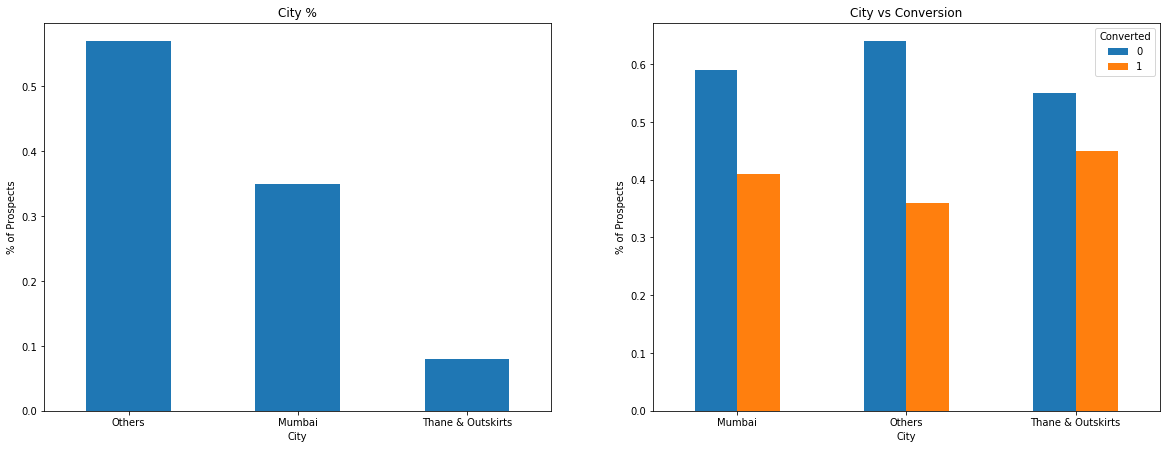

In [57]:
# Plotting w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['City'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('City %')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['City'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('City vs Conversion')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [58]:
# Checking unique value counts 

round(data['City'].value_counts(normalize=True),3).sort_values(ascending = False)

Others               0.570
Mumbai               0.349
Thane & Outskirts    0.081
Name: City, dtype: float64

In [59]:
print("________________________________")

print("City v/s Conversion %")
print("________________________________")
print(round(pd.crosstab(data['City'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("________________________________")

________________________________
City v/s Conversion %
________________________________
Converted             0     1
City                         
Mumbai             0.59  0.41
Others             0.64  0.36
Thane & Outskirts  0.55  0.45
________________________________


    -Univariate Analysis states that ~57% of the City is from 'Others' category, followed by ~35% from 'Mumbai'.
    - Bivariate Analysis states that 'Mumbai' as a City has 41% of Conversion and 'Others' has 36% of Conversion.
    -All calculations are as shown above.

### Handling 'A free copy of Mastering The Interview' column

In [60]:
# Checking unique value counts 

data['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

### Univariate and Bivariate Analysis of 'A free copy of Mastering The Interview' column

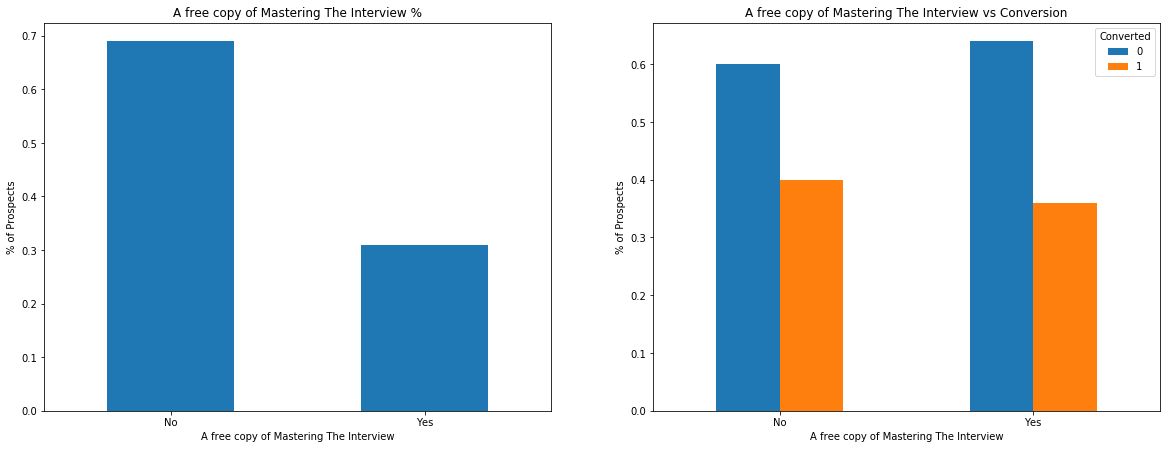

In [61]:
#Ploting the variable w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['A free copy of Mastering The Interview'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('A free copy of Mastering The Interview %')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['A free copy of Mastering The Interview'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('A free copy of Mastering The Interview vs Conversion')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [62]:
# Checking unique value counts 

round(data['A free copy of Mastering The Interview'].value_counts(normalize=True),3).sort_values(ascending = False)

No     0.687
Yes    0.313
Name: A free copy of Mastering The Interview, dtype: float64

In [63]:
print("________________________________________________________")

print("A free copy of Mastering The Interview v/s Conversion %")
print("________________________________________________________")
print(round(pd.crosstab(data['A free copy of Mastering The Interview'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("________________________________________________________")

________________________________________________________
A free copy of Mastering The Interview v/s Conversion %
________________________________________________________
Converted                                  0     1
A free copy of Mastering The Interview            
No                                      0.60  0.40
Yes                                     0.64  0.36
________________________________________________________


    -Univariate Analysis states that ~68% of the customer said they do not need 'A free copy of Mastering The Interview'.
    - Bivariate Analysis states that only ~36% of  people who said they need  'A free copy of Mastering The Interview' were converted.
    -All calculations are as shown above.

### Handling 'Last Notable Activity' column

In [64]:
# Checking unique value counts 

data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

    -Merging less frequent values of 'Last Notable Activity' to 'Others' category.
    -Looking at the proportions of various values in 'Last Notable Activity', we could see there are couple of low frequent values in there.
    -We will merge them into a new category 'Others'

In [65]:
# Merging low frequency items to Others

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                                                       'Had a Phone Conversation', 'Email Marked Spam', 'Form Submitted on Website',
                                                                       'Resubscribed to emails', 'View in browser link Clicked', 'Approached upfront',
                                                                       'Email Received'], 'Others')

In [66]:
# Checking unique value counts 

data['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Others                      160
Name: Last Notable Activity, dtype: int64

### Univariate and Bivariate Analysis of 'Last Notable Activity' column

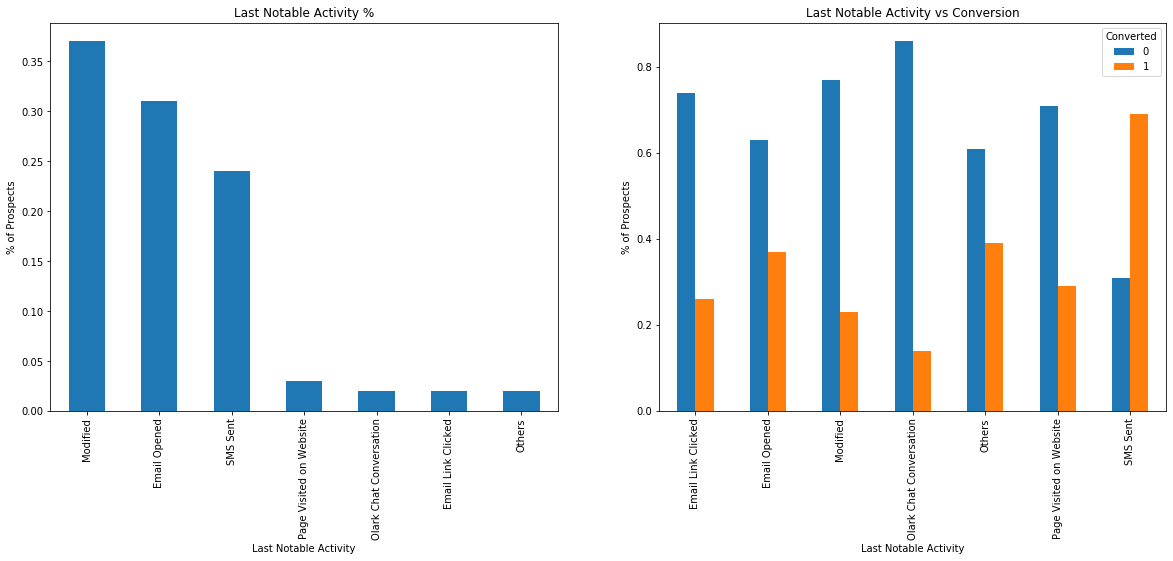

In [67]:
# Plotting w.r.t self as well as w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Last Notable Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Last Notable Activity %')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Last Notable Activity'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Notable Activity vs Conversion')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [68]:
# Checking unique value counts 

round(data['Last Notable Activity'].value_counts(normalize=True),3).sort_values(ascending = False)

Modified                   0.369
Email Opened               0.306
SMS Sent                   0.235
Page Visited on Website    0.034
Olark Chat Conversation    0.020
Email Link Clicked         0.019
Others                     0.017
Name: Last Notable Activity, dtype: float64

In [69]:
print("_______________________________________")

print("Last Notable Activity v/s Conversion %")
print("_______________________________________")
print(round(pd.crosstab(data['Last Notable Activity'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("_______________________________________")

_______________________________________
Last Notable Activity v/s Conversion %
_______________________________________
Converted                   0     1
Last Notable Activity              
Email Link Clicked       0.74  0.26
Email Opened             0.63  0.37
Modified                 0.77  0.23
Olark Chat Conversation  0.86  0.14
Others                   0.61  0.39
Page Visited on Website  0.71  0.29
SMS Sent                 0.31  0.69
_______________________________________


    -Univariate Analysis states that ~37% of the Last Notable Activity is 'Modified' category, followed by ~31% from 'Email Opened'.
    - Bivariate Analysis states that 'Email Opened' has 37% of Conversion and 'Modified' has 23% of Conversion.
    -All calculations are as shown above.

## Exploring Numerical Variables & Outlier Handling

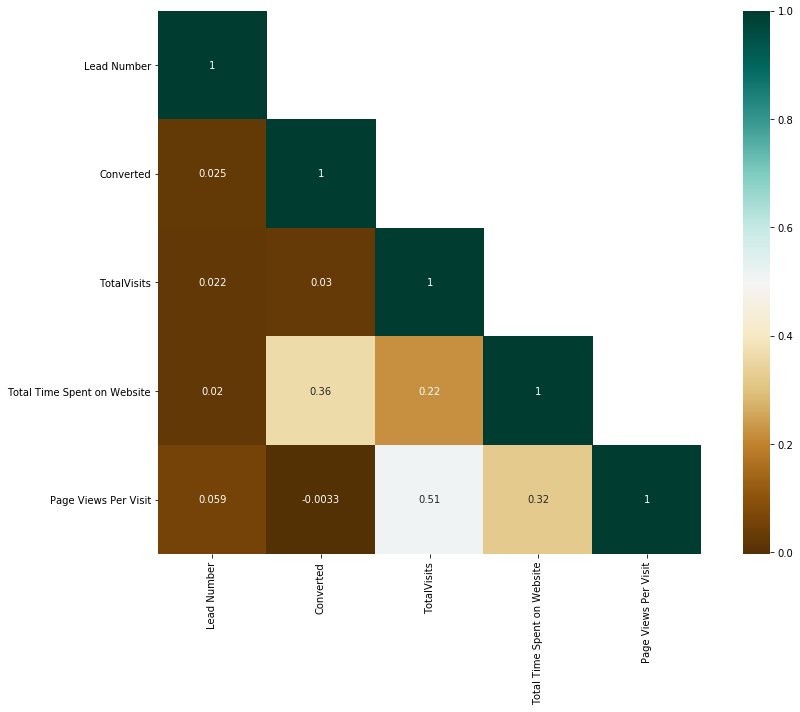

In [70]:
#Checking correlations between numeric variables

cor_mat= data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15,10)
axes = sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="BrBG")
ymin, ymax = axes.get_ylim()
axes.set_ylim(ymin + .5, ymax - .5)
plt.xticks(rotation=90)
plt.show()

    -The Heat Map tells us that there is a strong correlation between 'TotalVisits' & 'Page View Per Visit'.
    -We will handle this during our Multi Colinearity check.

In [71]:
#Checking overall columns list to analyse

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9240 non-null object
Country                                          6779 non-null object
Specialization                                   9240 

In [72]:
#Checking to drop list, as we donot want to analyse these columns

to_drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation',
 'Prospect ID',
 'Lead Number']

In [73]:
# Getting all numerical variables

data_num = data.select_dtypes(exclude = 'object')
data_num.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [74]:
# Removing target variable and 'Lead Number'

data_num = data_num.drop('Converted',axis=1)
data_num = data_num.drop('Lead Number',axis=1)
data_num.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

### Outlier Handling Approach

    -For outlier handling we have deployed the IQR CAPPING Method.
    -That is we will identify the outlier in each of the numeric variable and impute them with IQR * 1.5.
    -This will help us to remove the Outlier also retain the rows.

In [75]:
Q1 = data_num.quantile(0.25)
Q1

TotalVisits                     1.0
Total Time Spent on Website    12.0
Page Views Per Visit            1.0
Name: 0.25, dtype: float64

In [76]:
Q3 = data_num.quantile(0.75)
Q3

TotalVisits                      5.0
Total Time Spent on Website    936.0
Page Views Per Visit             3.0
Name: 0.75, dtype: float64

In [77]:
IQR = Q3 - Q1
print(IQR)

TotalVisits                      4.0
Total Time Spent on Website    924.0
Page Views Per Visit             2.0
dtype: float64


In [78]:
IQR*1.5

TotalVisits                       6.0
Total Time Spent on Website    1386.0
Page Views Per Visit              3.0
dtype: float64

In [79]:
data_num.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


#### Checking for Outliers


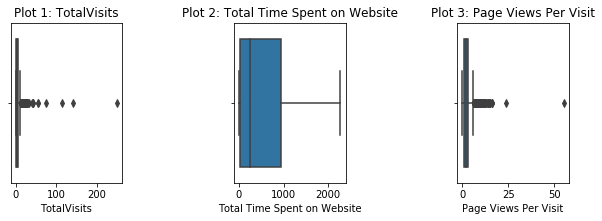

In [80]:
# Checking for outliers in all the numerical columns

plt.figure(figsize=(10,10))

for i in enumerate(data_num):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data[i[1]])
    plt.title("Plot "+str(i[0]+1)+": "+i[1])
plt.subplots_adjust(wspace=1,hspace=0.2)
    
plt.show()

    -We could see that TotalVisits and Page Views Per Visits has Outliers.
    -As mentioned in the Outlier handling Approach above, we will impute it using IQR*1.5 .

### Handling 'TotalVisits' column

In [81]:
# Checking count of unique values

data['TotalVisits'].value_counts(bins=3)

(-0.252, 83.667]     9100
(83.667, 167.333]       2
(167.333, 251.0]        1
Name: TotalVisits, dtype: int64

In [82]:
# Checking statistical summary of TotalVisits

round(data['TotalVisits'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count    9103.00
mean        3.45
std         4.85
min         0.00
25%         1.00
50%         3.00
75%         5.00
90%         7.00
99%        17.00
100%      251.00
max       251.00
Name: TotalVisits, dtype: float64

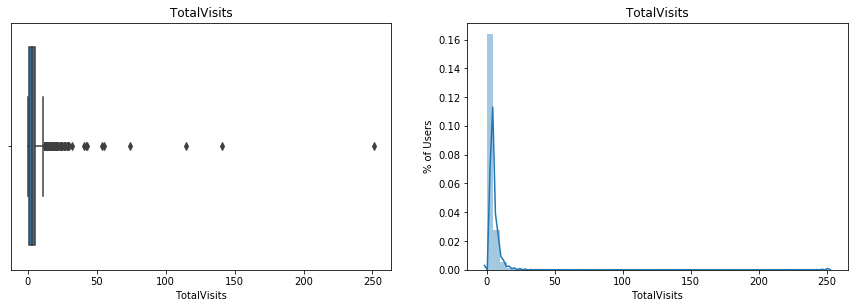

In [83]:
#Plotting before outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(data['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)

plt.subplot(222)
sns.distplot(data['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()

In [84]:
# replacing the outlier  (Q3 + 1.5*IQR) with 1.5*IQR

data.loc[data['TotalVisits'] > 11, 'TotalVisits'] = 6

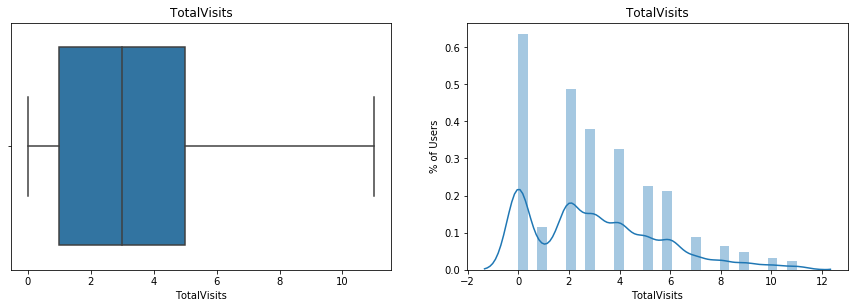

In [85]:
# Plotting after Outlier Handling

plt.figure(figsize=(15, 10))


plt.subplot(221)
sns.boxplot(data['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
 

plt.subplot(222)
sns.distplot(data['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()

### Handling 'Page Views Per Visit' column

In [86]:
# Checking unique value bins

data['Page Views Per Visit'].value_counts(bins=3)

(-0.056, 18.333]    9101
(36.667, 55.0]         1
(18.333, 36.667]       1
Name: Page Views Per Visit, dtype: int64

In [87]:
# Checking values at major percentiles

round(data['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count    9103.00
mean        2.36
std         2.16
min         0.00
25%         1.00
50%         2.00
75%         3.00
90%         5.00
99%         9.00
100%       55.00
max        55.00
Name: Page Views Per Visit, dtype: float64

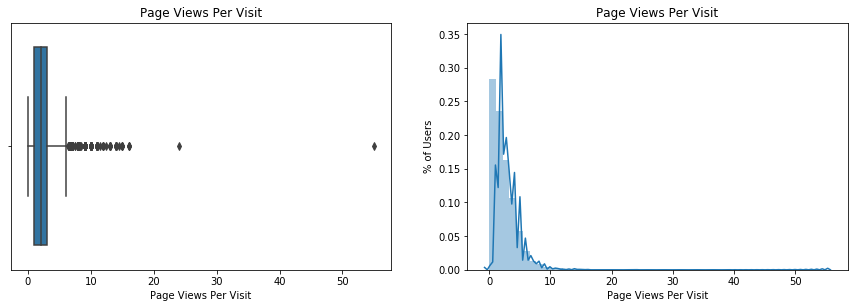

In [88]:
#Plotting before Outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(data['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
 
plt.subplot(222)
sns.distplot(data['Page Views Per Visit'].dropna())
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()

In [89]:
# replacing the outlier  (Q3 + 1.5*IQR) with 1.5*IQR

data.loc[data['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 3

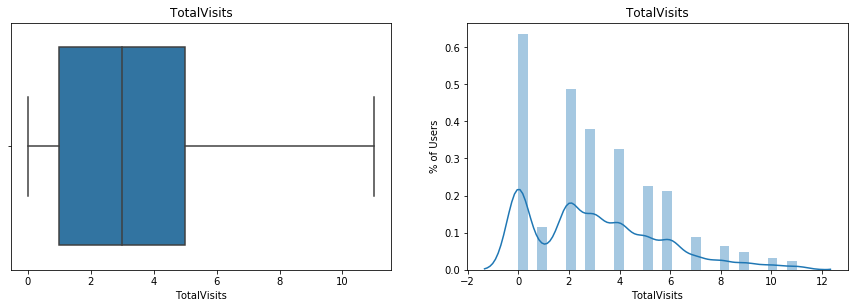

In [90]:
# Plotting after Outlier Handling

plt.figure(figsize=(15, 10))


plt.subplot(221)
sns.boxplot(data['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
 

plt.subplot(222)
sns.distplot(data['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()



    -All the outliers are treated now.

In [91]:
#Shape of data

data.shape

(9240, 30)

#### Create the final dataframe by excluding the 'to_drop_list' columns

In [92]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Others,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Others,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [93]:
new_data=data[data.columns[~data.columns.isin(to_drop_list)]]
new_data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Interested in other courses,Others,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Ringing,Others,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Will revert after reading the email,Mumbai,No,Modified


In [94]:
#Checking shape of new dataframe

new_data.shape

(9240, 12)

#### Checking the NULL Values

In [95]:
#checking percentage of null values in each columns

round(100*(new_data.isnull().sum()/len(new_data.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

#### Dropping NULL value rows from the columns 'TotalVisits' & 'Page Views Per Visit'

In [96]:
new_data = new_data.dropna(subset=['Page Views Per Visit','TotalVisits'])
new_data.shape

(9103, 12)

In [97]:
#checking null values in each columns

new_data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [98]:
# Check the missing values in at row level

missing=new_data.isnull().sum(axis=1)
missing[missing!=0]

Series([], dtype: int64)

    -All the Null Values are removed, and we have our final dataframe.
    -We will use this df for dummy value creation and standardization before building our final Model.

### Checking % of data retained

In [99]:
round((100*new_data.shape[0]/len(data)),2)

98.52

    -Finally we retained ~99% of the data, which is really good.

### Dummy Variable Creation

In [100]:
#checking for categorical variables with 2 classes. We need to identify them and convert it to integer before applying Dummy

for col in new_data:
    print(new_data[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64 

Google              2902
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64 

0    5642
1    3461
Name: Converted, dtype: int64 

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      733
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
Name: TotalVisits, dtype: int64 

0       2193
60        19
75        18
127       18
74        17
        ... 
1235       1
1091       1
1043       1
1035       1
1891       1
Name: Total Time Spent on Website, Length: 1717, dtype: int64 

0.00    2189
2.00    1795
3.00    1556
4.00     896
1.00     651
5.00     517
1.50     306
6.00     244
2.50     241
3.50      94
1.33      66
1.67      60

In [101]:
# Only 'A free copy of Mastering The Interview' variable has two class

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
new_data[varlist] = new_data[varlist].apply(binary_map)

In [102]:
# Checking count

new_data['A free copy of Mastering The Interview'].value_counts()

0    6215
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [103]:
# Converting 'A free copy of Mastering The Interview' to Integer

new_data['A free copy of Mastering The Interview'] = new_data['A free copy of Mastering The Interview'].astype("int64")

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
Lead Origin                               9103 non-null object
Lead Source                               9103 non-null object
Converted                                 9103 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9103 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9103 non-null object
Specialization                            9103 non-null object
Tags                                      9103 non-null object
City                                      9103 non-null object
A free copy of Mastering The Interview    9103 non-null int64
Last Notable Activity                     9103 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 924.5+ KB


    -All necessary conversions and cleaning are done before we apply our Dummy.

In [104]:
# Creating Dummy, delete the first dummy and dropping the original:

new_data = pd.get_dummies(new_data, drop_first=True)
new_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [105]:
new_data.shape

(9103, 50)

### Train-Test Split

In [106]:
# Putting feature variable to X

X = new_data.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [107]:
# Putting response variable to y

y = new_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [108]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Looking at Correlations

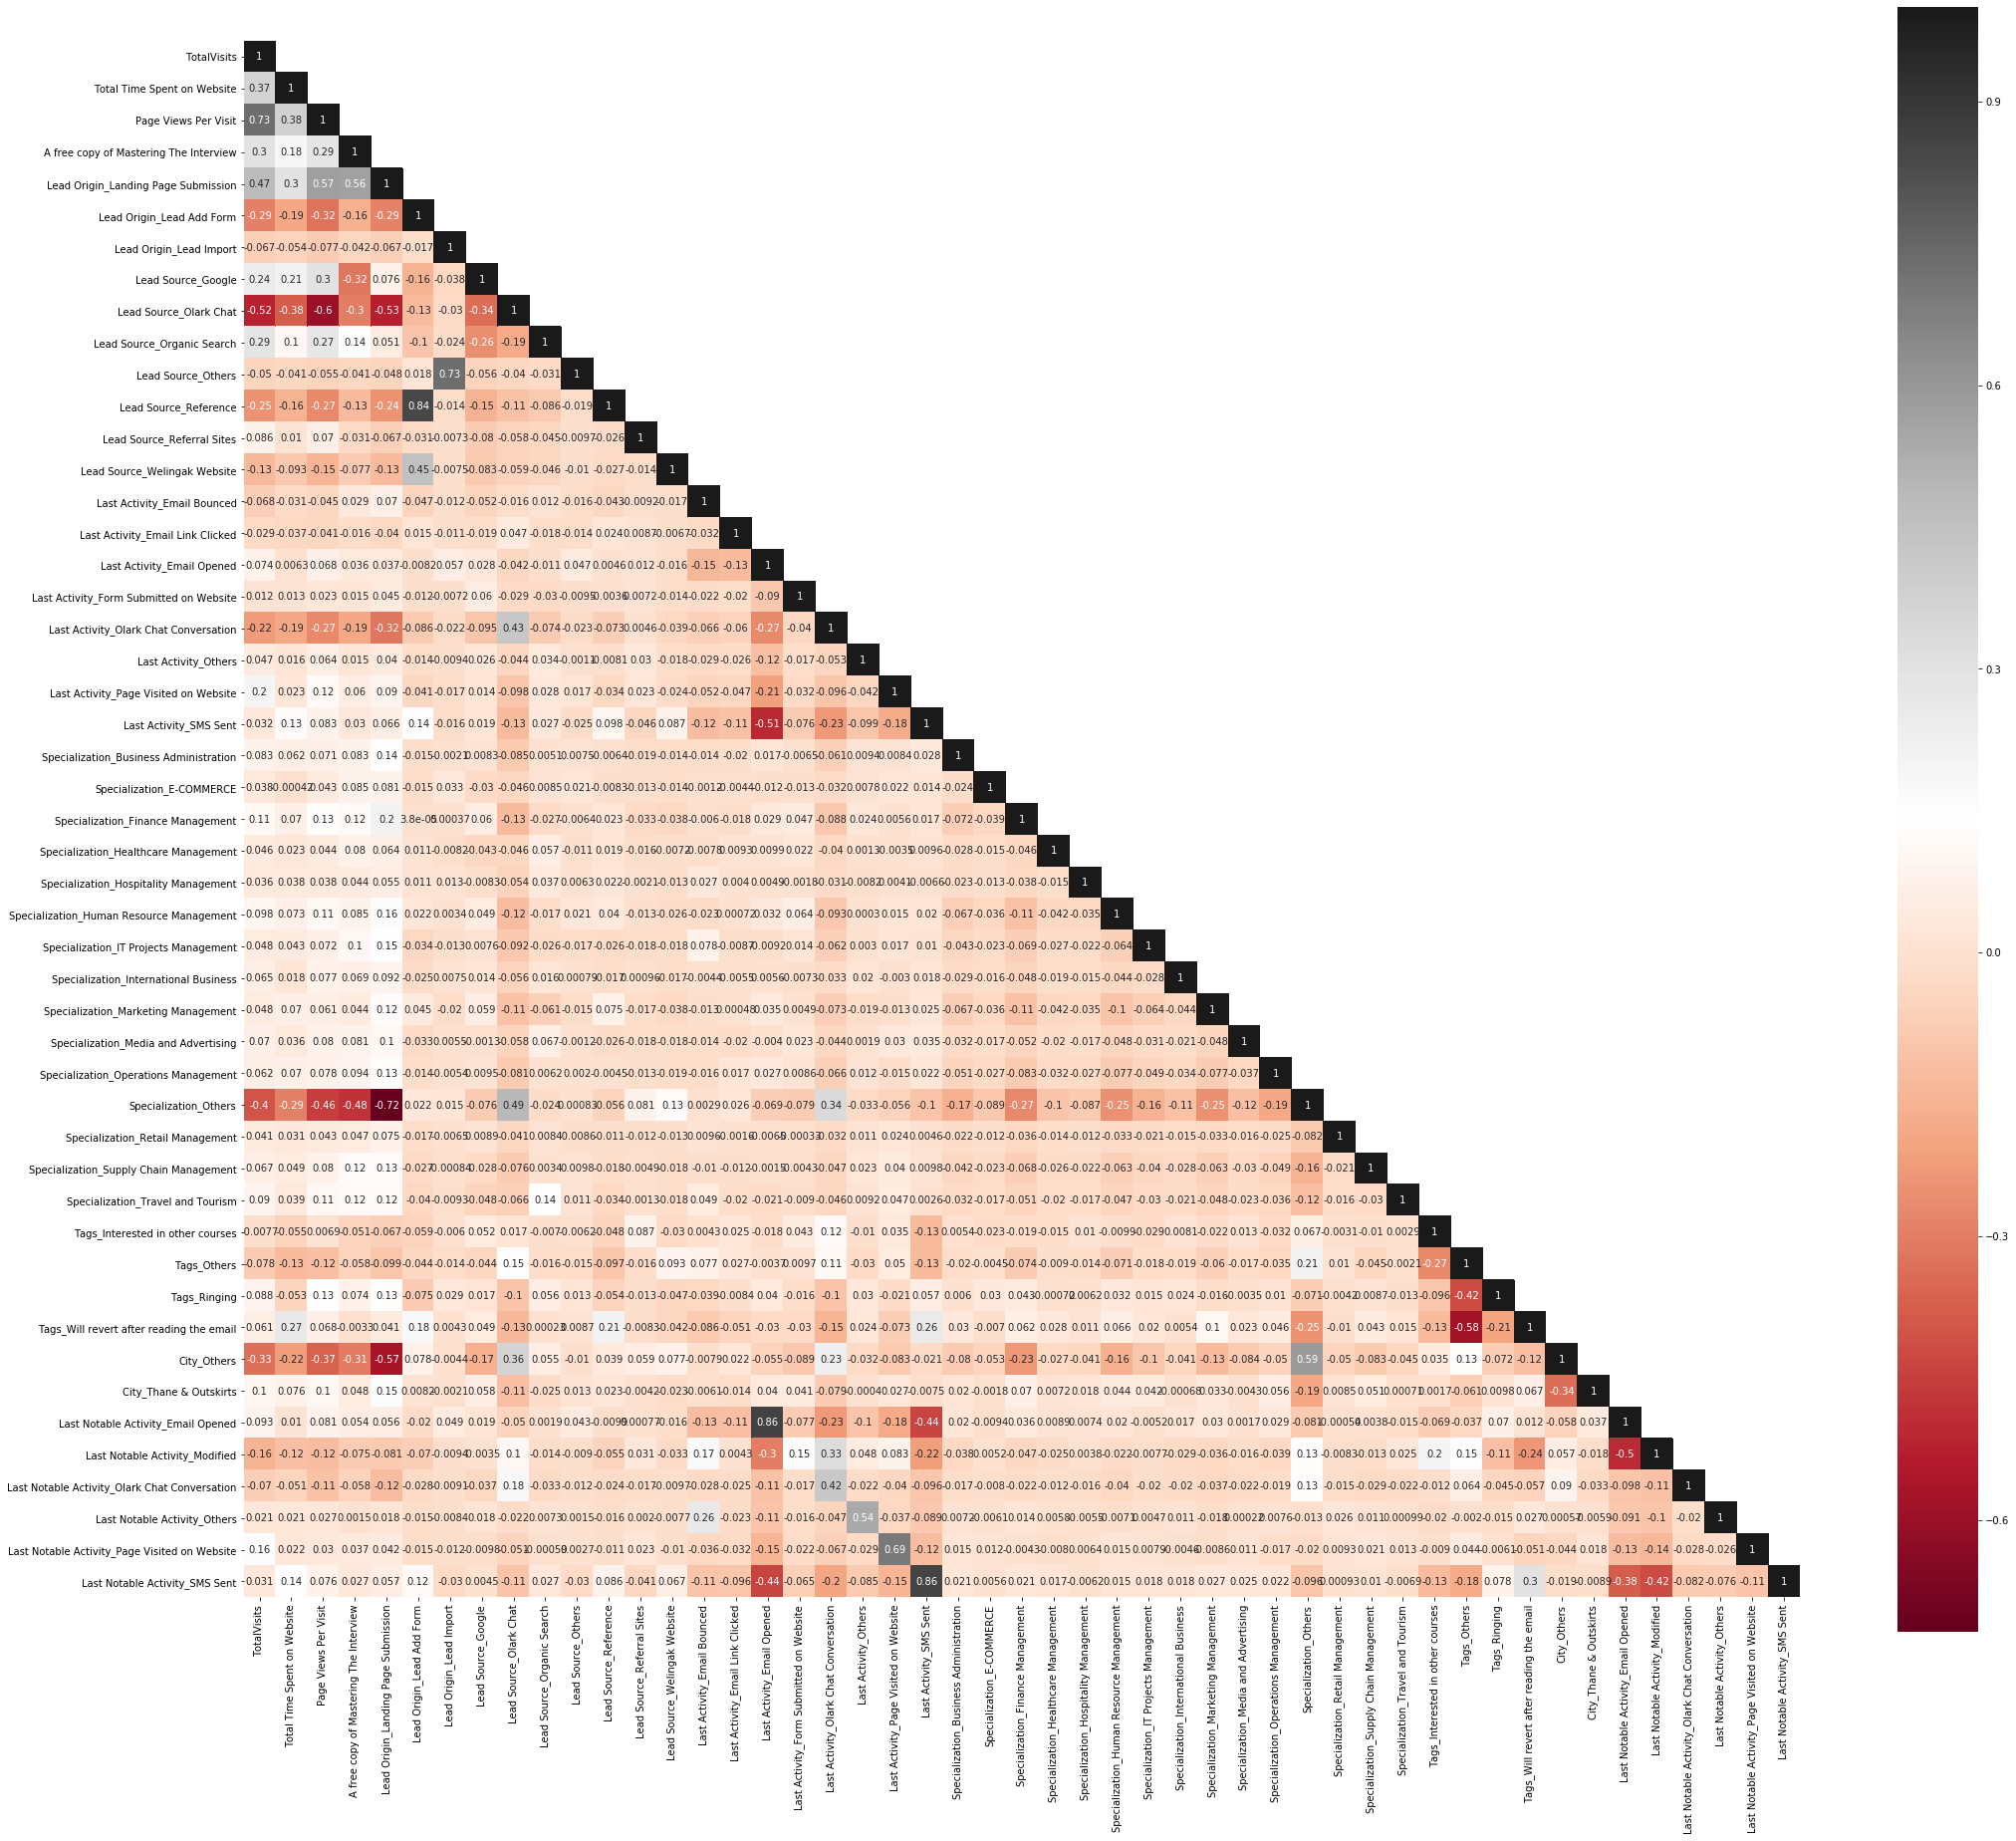

In [109]:
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
axes = sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
ymin, ymax = axes.get_ylim()
axes.set_ylim(ymin + .5, ymax - .5)
plt.show()

    -There seems to be few highly correlated variables.
    -We will remove all highly correlated variables above 0.4 'r value'.

#### Dropping highly correlated dummy variables

In [110]:
X_test = X_test.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website', 'Tags_Others'], 1)

X_train = X_train.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website', 'Tags_Others'], 1)

In [111]:
X_test.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
3504,3.0,424,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4050,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
7201,2.0,712,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1196,4.0,423,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
8219,7.0,247,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Checking the Correlation Matrix after dropping highly correlated variables

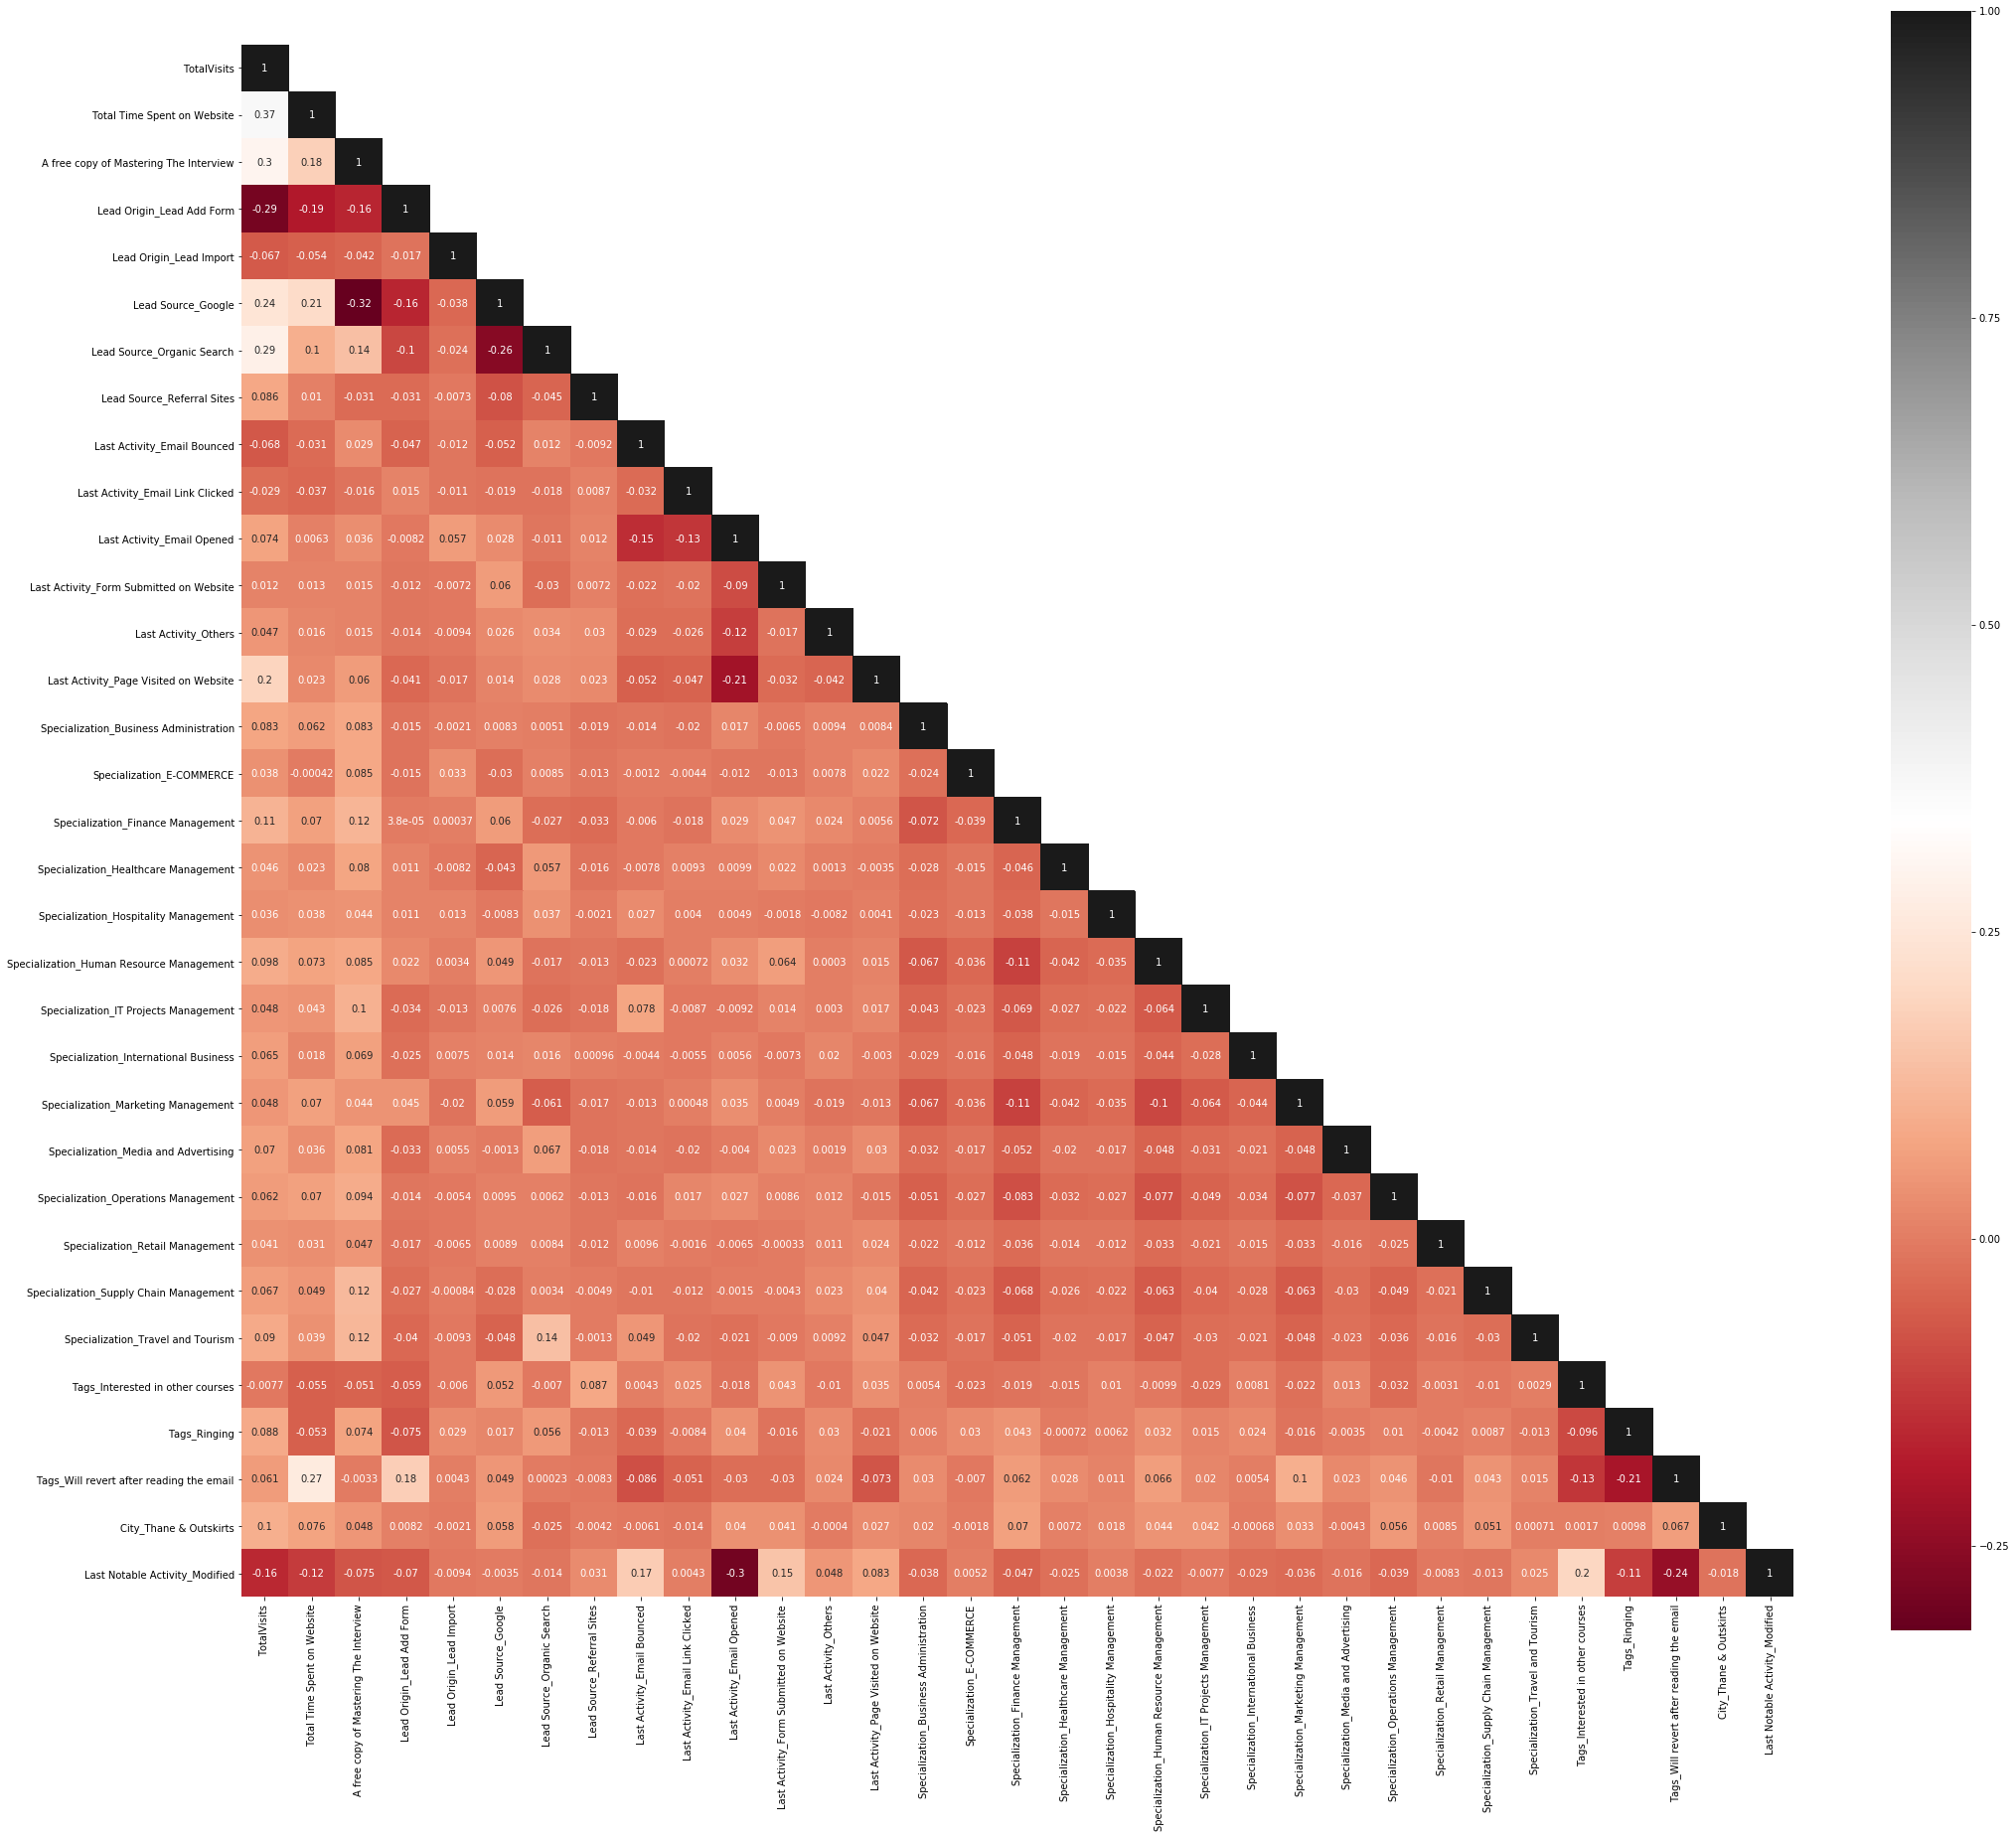

In [112]:
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
axes = sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
ymin, ymax = axes.get_ylim()
axes.set_ylim(ymin + .5, ymax - .5)
plt.show()

### Feature Scaling

In [113]:
X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
9000,2.0,60,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6902,1.0,495,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7593,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1498,9.0,413,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4137,6.0,1049,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [114]:
# Selecting the variables that needs to be scaled

var_to_scale=['TotalVisits','Total Time Spent on Website']

In [115]:
scaler = StandardScaler()

X_train[var_to_scale] = scaler.fit_transform(X_train[var_to_scale])

X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
9000,-0.414618,-0.771069,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6902,-0.798210,0.026359,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7593,-1.181802,-0.881059,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1498,2.270525,-0.123961,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4137,1.119749,1.041934,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Model Building

### Model - 1 (Train)

In [116]:
import statsmodels.api as sm

# Logistic regression model

X_train_sm = sm.add_constant(X_train)

logm1 = sm.Logit(y_train, X_train_sm)
logm1_model = logm1.fit()

logm1_model.summary()

Optimization terminated successfully.
         Current function value: 0.295196
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7248
Method:                           MLE   Df Model:                           33
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                  0.5551
Time:                        17:03:06   Log-Likelihood:                -2149.6
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.1302      0.101     -1.295      0.195      -0.327       0.067
TotalVisits                                  0.0910      0.051      1.790      0.073      -0.009       0.191
Total Time Spent on Website                  1.0044      0.044     22.920      0.000       0.919       1.090
A free copy of Mastering The Interview      -0.3427      0.113     -3.034      0.002      -0.564      -0.121
Lead Origin_Lead Add Form                    4.4064      0.232     18.979      0.000       3.951       4.861
Lead Origin_Lead Import                      0.5848      0.667      0.877      0.380      -0.722       1.891
Lead Source_Google                          -0.2486      0.107     -2.317      0.020      -0.459      -0.038
Lead Source_Organic Search                  -0.1860      0.134     -1.388      0.165      -0.448       0.077
Lead Source_Referral Sites                  -0.7159      0.398     -1.797      0.072      -1.497       0.065
Last Activity_Email Bounced                 -2.0547      0.342     -6.015      0.000      -2.724      -1.385
Last Activity_Email Link Clicked            -0.7962      0.233     -3.416      0.001      -1.253      -0.339
Last Activity_Email Opened                  -0.6611      0.090     -7.373      0.000      -0.837      -0.485
Last Activity_Form Submitted on Website     -0.2825      0.354     -0.798      0.425      -0.976       0.411
Last Activity_Others                        -0.3350      0.288     -1.163      0.245      -0.900       0.230
Last Activity_Page Visited on Website       -0.9925      0.166     -5.986      0.000      -1.317      -0.668
Specialization_Business Administration      -0.1696      0.208     -0.817      0.414      -0.576       0.237
Specialization_E-COMMERCE                    0.1609      0.351      0.458      0.647      -0.527       0.849
Specialization_Finance Management           -0.1102      0.152     -0.728      0.467      -0.407       0.187
Specialization_Healthcare Management        -0.4927      0.332     -1.483      0.138      -1.144       0.158
Specialization_Hospitality Management       -0.4014      0.365     -1.100      0.271      -1.117       0.314
Specialization_Human Resource Management    -0.1059      0.160     -0.663      0.507      -0.419       0.207
Specialization_IT Projects Management       -0.0771      0.228     -0.338      0.735      -0.524       0.370
Specialization_International Business       -0.4556      0.303     -1.504      0.132      -1.049       0.138
Specialization_Marketing Management          0.0463      0.153      0.302      0.763      -0.254       0.347
Specialization_Media and Advertising        -0.1269      0.280     -0.454      0.650      -0.675       0.421
Specialization_Operations Management         0.0271      0.186      0.146      0.884      -0.338       0.392
Specialization_Retail Management            -0.2207      0.353     -0.624      0

### Feature Selection Using RFE

In [117]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [118]:
# running RFE with 15 variables as output

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [119]:
rfe.support_

array([False,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True,  True,  True, False,  True])

In [120]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Referral Sites', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Others', False, 3),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-COMMERCE', False, 6),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 2),
 ('Specialization_Human Resource Management', False, 14),
 ('Specialization_IT Projects Management', False, 19),
 ('Specialization_Interna

In [121]:
#Columns to be selected 

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [122]:
#Columns not to be selected 

X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management', 'City_Thane & Outskirts'],
      dtype='object')

### Model - 2 (Train)

    -We will build model using RFE support columns below.

In [123]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.Logit(y_train, X_train_sm)
logm2_model = logm2.fit()
logm2_model.summary()

Optimization terminated successfully.
         Current function value: 0.296769
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7266
Method:                           MLE   Df Model:                           15
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                  0.5527
Time:                        17:03:08   Log-Likelihood:                -2161.1
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3958      0.071     -5.592      0.000      -0.535      -0.257
Total Time Spent on Website                  0.9609      0.040     24.278      0.000       0.883       1.039
Lead Origin_Lead Add Form                    4.4667      0.226     19.785      0.000       4.024       4.909
Lead Origin_Lead Import                      0.6593      0.664      0.993      0.321      -0.642       1.961
Lead Source_Referral Sites                  -0.4984      0.393     -1.267      0.205      -1.270       0.273
Last Activity_Email Bounced                 -2.0372      0.339     -6.015      0.000      -2.701      -1.373
Last Activity_Email Link Clicked            -0.7677      0.233     -3.297      0.001      -1.224      -0.311
Last Activity_Email Opened                  -0.6588      0.088     -7.522      0.000      -0.830      -0.487
Last Activity_Page Visited on Website       -0.9480      0.160     -5.941      0.000      -1.261      -0.635
Specialization_Healthcare Management        -0.5243      0.318     -1.651      0.099      -1.147       0.098
Specialization_International Business       -0.4291      0.290     -1.480      0.139      -0.997       0.139
Specialization_Travel and Tourism           -0.8537      0.300     -2.846      0.004      -1.442      -0.266
Tags_Interested in other courses            -2.4274      0.330     -7.360      0.000      -3.074      -1.781
Tags_Ringing                                -3.3719      0.233    -14.471      0.000      -3.829      -2.915
Tags_Will revert after reading the email     4.1521      0.158     26.323      0.000       3.843       4.461
Last Notable Activity_Modified              -1.1261      0.089    -12.647      0.000      -1.301      -0.952
============================================================================================================
"""

### Checking VIFs

In [124]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Modified,1.31
13,Tags_Will revert after reading the email,1.29
6,Last Activity_Email Opened,1.22
1,Lead Origin_Lead Add Form,1.18
0,Total Time Spent on Website,1.16
11,Tags_Interested in other courses,1.13
12,Tags_Ringing,1.10
4,Last Activity_Email Bounced,1.08
7,Last Activity_Page Visited on Website,1.08
10,Specialization_Travel and Tourism,1.03


    -We will remove 'Lead Origin_Lead Import' as this variable has an 'Insiginificant P Value'.

In [126]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [127]:
col2=['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified']
col2

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Referral Sites',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_International Business',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### Model - 3 (Train)

    -Build our third model after removing the variable with Insignificant P Value.

In [128]:
X_train_sm = sm.add_constant(X_train[col2])

logm3 = sm.Logit(y_train, X_train_sm)
logm3_model = logm3.fit()
logm3_model.summary()

Optimization terminated successfully.
         Current function value: 0.296832
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7267
Method:                           MLE   Df Model:                           14
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                  0.5526
Time:                        17:03:09   Log-Likelihood:                -2161.5
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3949      0.071     -5.580      0.000      -0.534      -0.256
Total Time Spent on Website                  0.9588      0.040     24.271      0.000       0.881       1.036
Lead Origin_Lead Add Form                    4.4620      0.226     19.773      0.000       4.020       4.904
Lead Source_Referral Sites                  -0.5007      0.394     -1.272      0.203      -1.272       0.271
Last Activity_Email Bounced                 -2.0378      0.339     -6.017      0.000      -2.702      -1.374
Last Activity_Email Link Clicked            -0.7687      0.233     -3.301      0.001      -1.225      -0.312
Last Activity_Email Opened                  -0.6561      0.088     -7.496      0.000      -0.828      -0.485
Last Activity_Page Visited on Website       -0.9487      0.160     -5.946      0.000      -1.261      -0.636
Specialization_Healthcare Management        -0.5262      0.318     -1.656      0.098      -1.149       0.096
Specialization_International Business       -0.4258      0.289     -1.473      0.141      -0.993       0.141
Specialization_Travel and Tourism           -0.8557      0.300     -2.851      0.004      -1.444      -0.268
Tags_Interested in other courses            -2.4274      0.330     -7.362      0.000      -3.074      -1.781
Tags_Ringing                                -3.3700      0.233    -14.463      0.000      -3.827      -2.913
Tags_Will revert after reading the email     4.1576      0.158     26.363      0.000       3.848       4.467
Last Notable Activity_Modified              -1.1255      0.089    -12.641      0.000      -1.300      -0.951
============================================================================================================
"""

### Checking VIFs

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,1.31
12,Tags_Will revert after reading the email,1.29
5,Last Activity_Email Opened,1.22
1,Lead Origin_Lead Add Form,1.17
0,Total Time Spent on Website,1.16
10,Tags_Interested in other courses,1.13
11,Tags_Ringing,1.10
3,Last Activity_Email Bounced,1.08
6,Last Activity_Page Visited on Website,1.08
9,Specialization_Travel and Tourism,1.03


    -We will remove 'Lead Source_Referral Sites' as this variable has an 'Insiginificant P Value'.

In [130]:
col2

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Referral Sites',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_International Business',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

In [131]:
col3=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_International Business',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

col3

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_International Business',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### Model - 4 (Train)

    -Build our third model after removing the variable with Insignificant P Value.

In [132]:
X_train_sm = sm.add_constant(X_train[col3])

logm4 = sm.Logit(y_train, X_train_sm)
logm4_model = logm4.fit()
logm4_model.summary()

Optimization terminated successfully.
         Current function value: 0.296951
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7268
Method:                           MLE   Df Model:                           13
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                  0.5524
Time:                        17:03:09   Log-Likelihood:                -2162.4
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3995      0.071     -5.650      0.000      -0.538      -0.261
Total Time Spent on Website                  0.9588      0.040     24.271      0.000       0.881       1.036
Lead Origin_Lead Add Form                    4.4676      0.226     19.799      0.000       4.025       4.910
Last Activity_Email Bounced                 -2.0342      0.339     -6.007      0.000      -2.698      -1.370
Last Activity_Email Link Clicked            -0.7727      0.233     -3.322      0.001      -1.229      -0.317
Last Activity_Email Opened                  -0.6577      0.088     -7.516      0.000      -0.829      -0.486
Last Activity_Page Visited on Website       -0.9546      0.160     -5.983      0.000      -1.267      -0.642
Specialization_Healthcare Management        -0.5205      0.318     -1.639      0.101      -1.143       0.102
Specialization_International Business       -0.4209      0.289     -1.455      0.146      -0.988       0.146
Specialization_Travel and Tourism           -0.8536      0.300     -2.849      0.004      -1.441      -0.266
Tags_Interested in other courses            -2.4505      0.329     -7.438      0.000      -3.096      -1.805
Tags_Ringing                                -3.3672      0.233    -14.449      0.000      -3.824      -2.910
Tags_Will revert after reading the email     4.1553      0.158     26.358      0.000       3.846       4.464
Last Notable Activity_Modified              -1.1250      0.089    -12.634      0.000      -1.299      -0.950
============================================================================================================
"""

### Checking VIFs

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.30
11,Tags_Will revert after reading the email,1.29
4,Last Activity_Email Opened,1.22
1,Lead Origin_Lead Add Form,1.17
0,Total Time Spent on Website,1.16
9,Tags_Interested in other courses,1.12
10,Tags_Ringing,1.10
2,Last Activity_Email Bounced,1.08
5,Last Activity_Page Visited on Website,1.07
8,Specialization_Travel and Tourism,1.03


    -We will remove 'Specialization_International Business' as this variable has an 'Insiginificant P Value'.

In [134]:
col3

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_International Business',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

In [135]:
col4=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

col4

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### Model - 5 (Train)

    -Build our third model after removing the variable with Insignificant P Value.

In [136]:
X_train_sm = sm.add_constant(X_train[col4])

logm5 = sm.Logit(y_train, X_train_sm)
logm5_model = logm5.fit()
logm5_model.summary()

Optimization terminated successfully.
         Current function value: 0.297101
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7269
Method:                           MLE   Df Model:                           12
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                  0.5522
Time:                        17:03:10   Log-Likelihood:                -2163.5
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4084      0.070     -5.798      0.000      -0.546      -0.270
Total Time Spent on Website                  0.9563      0.039     24.249      0.000       0.879       1.034
Lead Origin_Lead Add Form                    4.4648      0.225     19.820      0.000       4.023       4.906
Last Activity_Email Bounced                 -2.0276      0.338     -5.993      0.000      -2.691      -1.365
Last Activity_Email Link Clicked            -0.7751      0.233     -3.331      0.001      -1.231      -0.319
Last Activity_Email Opened                  -0.6579      0.087     -7.520      0.000      -0.829      -0.486
Last Activity_Page Visited on Website       -0.9531      0.159     -5.978      0.000      -1.266      -0.641
Specialization_Healthcare Management        -0.5105      0.317     -1.609      0.108      -1.132       0.111
Specialization_Travel and Tourism           -0.8443      0.299     -2.820      0.005      -1.431      -0.257
Tags_Interested in other courses            -2.4485      0.329     -7.439      0.000      -3.094      -1.803
Tags_Ringing                                -3.3674      0.233    -14.438      0.000      -3.825      -2.910
Tags_Will revert after reading the email     4.1513      0.158     26.345      0.000       3.842       4.460
Last Notable Activity_Modified              -1.1214      0.089    -12.604      0.000      -1.296      -0.947
============================================================================================================
"""

### Checking VIFs

In [137]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.30
10,Tags_Will revert after reading the email,1.29
4,Last Activity_Email Opened,1.21
1,Lead Origin_Lead Add Form,1.17
0,Total Time Spent on Website,1.16
8,Tags_Interested in other courses,1.12
9,Tags_Ringing,1.10
2,Last Activity_Email Bounced,1.08
5,Last Activity_Page Visited on Website,1.07
7,Specialization_Travel and Tourism,1.03


    -We will remove 'Specialization_Healthcare Management' as this variable has an 'Insiginificant P Value'.

In [138]:
col4

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Healthcare Management',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

In [139]:
col5=['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

col5

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### Model - 6(Train)

    -Build our third model after removing the variable with Insignificant P Value.

In [140]:
X_train_sm = sm.add_constant(X_train[col5])

logm6 = sm.Logit(y_train, X_train_sm)
logm6_model = logm6.fit()
logm6_model.summary()

Optimization terminated successfully.
         Current function value: 0.297285
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7270
Method:                           MLE   Df Model:                           11
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                  0.5519
Time:                        17:03:11   Log-Likelihood:                -2164.8
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4190      0.070     -5.977      0.000      -0.556      -0.282
Total Time Spent on Website                  0.9544      0.039     24.223      0.000       0.877       1.032
Lead Origin_Lead Add Form                    4.4630      0.225     19.807      0.000       4.021       4.905
Last Activity_Email Bounced                 -2.0255      0.338     -5.994      0.000      -2.688      -1.363
Last Activity_Email Link Clicked            -0.7772      0.233     -3.339      0.001      -1.233      -0.321
Last Activity_Email Opened                  -0.6567      0.087     -7.509      0.000      -0.828      -0.485
Last Activity_Page Visited on Website       -0.9504      0.159     -5.972      0.000      -1.262      -0.638
Specialization_Travel and Tourism           -0.8347      0.299     -2.791      0.005      -1.421      -0.249
Tags_Interested in other courses            -2.4422      0.329     -7.424      0.000      -3.087      -1.797
Tags_Ringing                                -3.3614      0.233    -14.423      0.000      -3.818      -2.905
Tags_Will revert after reading the email     4.1464      0.157     26.328      0.000       3.838       4.455
Last Notable Activity_Modified              -1.1154      0.089    -12.557      0.000      -1.289      -0.941
============================================================================================================
"""

### Checking VIFs

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Modified,1.30
9,Tags_Will revert after reading the email,1.29
4,Last Activity_Email Opened,1.21
1,Lead Origin_Lead Add Form,1.17
0,Total Time Spent on Website,1.16
7,Tags_Interested in other courses,1.12
8,Tags_Ringing,1.10
2,Last Activity_Email Bounced,1.08
5,Last Activity_Page Visited on Website,1.07
6,Specialization_Travel and Tourism,1.03


    -No Multicollinearity in our variables and there are no insignificant p-values.

### Predicted Probability Calculation

In [142]:
# Getting the predicted values on the train set

y_train_pred = logm6_model.predict(X_train_sm)
y_train_pred

9000    0.093612
6902    0.081707
7593    0.128237
1498    0.232540
4137    0.983129
          ...   
367     0.128954
82      0.891798
8173    0.101516
7055    0.952899
5734    0.006365
Length: 7282, dtype: float64

In [143]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09361186, 0.08170712, 0.12823739, 0.23253994, 0.98312949,
       0.99533967, 0.00507647, 0.95698636, 0.78758376, 0.41632835])

### Creating a dataframe with the actual Converted flag and the Predicted probabilities

In [144]:
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,0,0.093612,9000
1,0,0.081707,6902
2,0,0.128237,7593
3,0,0.232540,1498
4,1,0.983129,4137


### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [145]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,Predicted
0,0,0.093612,9000,0
1,0,0.081707,6902,0
2,0,0.128237,7593,0
3,0,0.232540,1498,0
4,1,0.983129,4137,1


### Creating a Confusion Matrix

In [146]:
from sklearn import metrics

def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greens",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] )
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin + .5, ymax - .5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()
    

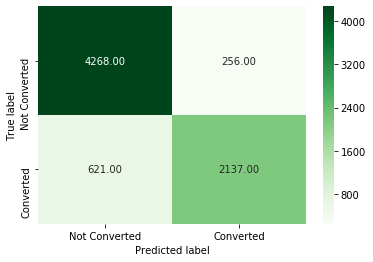

In [147]:
#Invoking the function

draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)

In [148]:
# Let's take a look at the confusion matrix again 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted )
confusion

array([[4268,  256],
       [ 621, 2137]], dtype=int64)

### Measuring Accuracies

In [149]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted))

0.8795660532820654


In [150]:
print( metrics.classification_report( y_train_pred_final.Converted_IND, y_train_pred_final.Predicted ) )

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4524
           1       0.89      0.77      0.83      2758

    accuracy                           0.88      7282
   macro avg       0.88      0.86      0.87      7282
weighted avg       0.88      0.88      0.88      7282



### Metrics beyond simply accuracy

In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our logistic regression model

print('Sensitivity : ',TP / float(TP+FN))

Sensitivity :  0.7748368382886149


In [153]:
# Let us calculate specificity

print('Specificity : ',TN / float(TN+FP))

Specificity :  0.9434129089301503


In [154]:
# Calculate false postive rate - predicting churn when customer does not have churned

print('FPR : ',FP/ float(TN+FP))

FPR :  0.05658709106984969


In [155]:
# positive predictive value 

print ('Positive Predicted Value : ',TP / float(TP+FP))

Positive Predicted Value :  0.893021312160468


In [156]:
# Negative predictive value

print ('Negative Predicted Value : ',TN / float(TN+ FN))

Negative Predicted Value :  0.8729801595418286


### Plotting the ROC Curve

An ROC curve demonstrates several things:
    
    -It shows the tradeoff between sensitivity and specificity(any increase in sensitivity will be accompanied by a decrease in specificity).
    -The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    -The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [157]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [158]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob, drop_intermediate = False )

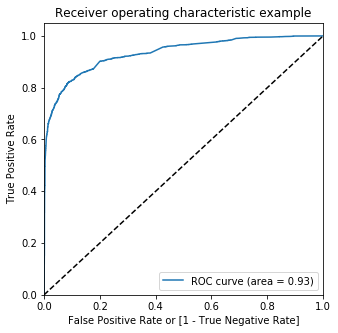

In [159]:
draw_roc(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity



In [160]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.093612,9000,0,1,0,0,0,0,0,0,0,0,0
1,0,0.081707,6902,0,1,0,0,0,0,0,0,0,0,0
2,0,0.128237,7593,0,1,1,0,0,0,0,0,0,0,0
3,0,0.232540,1498,0,1,1,1,0,0,0,0,0,0,0
4,1,0.983129,4137,1,1,1,1,1,1,1,1,1,1,1


In [161]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378742  1.000000  0.000000
0.1   0.1  0.684702  0.965555  0.513484
0.2   0.2  0.825872  0.908267  0.775641
0.3   0.3  0.868031  0.843727  0.882847
0.4   0.4  0.877369  0.808920  0.919098
0.5   0.5  0.879566  0.774837  0.943413
0.6   0.6  0.875309  0.736041  0.960212
0.7   0.7  0.868580  0.693619  0.975243
0.8   0.8  0.858967  0.649384  0.986737
0.9   0.9  0.841939  0.594634  0.992706


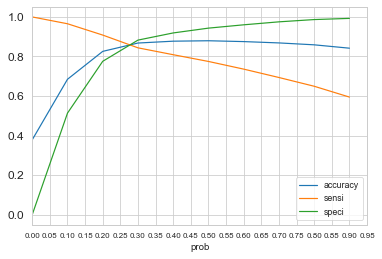

In [162]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

### From the curve above, 0.27 is the optimum point to take it as a threshold

In [163]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.27 else 0)

y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.093612,9000,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.081707,6902,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.128237,7593,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.232540,1498,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.983129,4137,1,1,1,1,1,1,1,1,1,1,1,1


In [164]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

0.8630870639934084

In [165]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted )
confusion2

array([[3929,  595],
       [ 402, 2356]], dtype=int64)

In [166]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap="Purples",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] )
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin + .5, ymax - .5)   
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

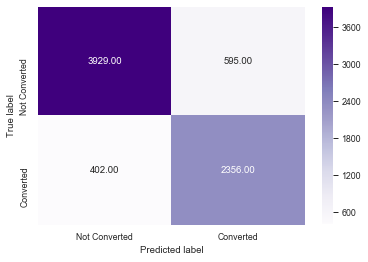

In [167]:
#Invoking the function

draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model

print('Sensitivity : ',TP / float(TP+FN))

Sensitivity :  0.8542422044960116


In [170]:
# Let us calculate specificity

print('Specificity : ',TN / float(TN+FP))

Specificity :  0.8684792219274978


In [171]:
# Calculate false postive rate - predicting churn when customer does not have churned

print('FPR : ',FP/ float(TN+FP))

FPR :  0.1315207780725022


In [172]:
# positive predictive value 

print ('Positive Predicted Value : ',TP / float(TP+FP))

Positive Predicted Value :  0.7983734327346662


In [173]:
# Negative predictive value

print ('Negative Predicted Value : ',TN / float(TN+ FN))

Negative Predicted Value :  0.9071807896559686


### Precision and Recall

In [174]:
from sklearn.metrics import precision_score, recall_score

#Precision Value
print('Precision : ',precision_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted))

#Recall Value
print('Recall : ',recall_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted))

Precision :  0.893021312160468
Recall :  0.7748368382886149


### Precision and Recall trade-off

For our Business Problem, The appropriate Metrics to be use will be Recall and Precision.

    -Because this will help us to identify the predicted CONVERTED is actual CONVERTED and
    -Probability that an actual CONVERTED case is predicted correctly.
So we will use the Precision-Recall trade off curve to identify the most optimised threshold.

In [175]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted_IND, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7277    0
 7278    1
 7279    1
 7280    1
 7281    0
 Name: Converted_IND, Length: 7282, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7277    0
 7278    1
 7279    0
 7280    1
 7281    0
 Name: Predicted, Length: 7282, dtype: int64)

In [176]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)

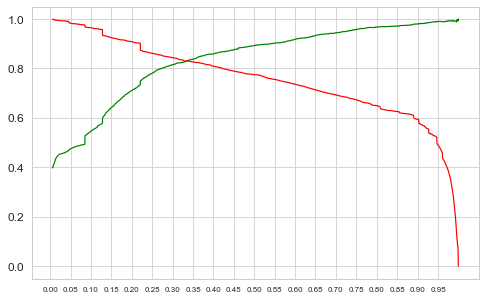

In [177]:
# Plotting the precision recall curve

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)

plt.show()

    -The Precission & Recall Trade Off seems to be 0.34 We will use this as threshold for Test data.

### From the curve above, 0.34 is the optimum point to take it as a threshold

In [178]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.093612,9000,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.081707,6902,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.128237,7593,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.232540,1498,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.983129,4137,1,1,1,1,1,1,1,1,1,1,1,1


In [179]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

0.8728371326558638

In [180]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted )
confusion3

array([[4069,  455],
       [ 471, 2287]], dtype=int64)

In [181]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap="Purples",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] )
    x,y = ax.get_ylim()
    ax.set_ylim(x + .5, y - .5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

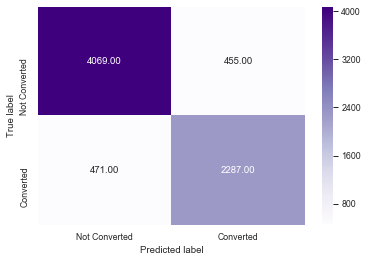

In [182]:
#Invoking the function

draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

In [183]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [184]:
# Let's see the sensitivity of our logistic regression model

print('Sensitivity : ',TP / float(TP+FN))

Sensitivity :  0.8292240754169689


In [185]:
# Let us calculate specificity

print('Specificity : ',TN / float(TN+FP))

Specificity :  0.8994252873563219


In [186]:
# Calculate false postive rate - predicting churn when customer does not have churned

print('FPR : ',FP/ float(TN+FP))

FPR :  0.10057471264367816


In [187]:
# positive predictive value 

print ('Positive Predicted Value : ',TP / float(TP+FP))

Positive Predicted Value :  0.8340627279358133


In [188]:
# Negative predictive value

print ('Negative Predicted Value : ',TN / float(TN+ FN))

Negative Predicted Value :  0.8962555066079295


### Precision and Recall

In [189]:
#Precision Value
print('Precision : ',confusion3[1,1]/(confusion3[0,1]+confusion3[1,1]))

#Recall Value
print('Recall : ',confusion3[1,1]/(confusion3[1,0]+confusion3[1,1]))

Precision :  0.8340627279358133
Recall :  0.8292240754169689


## Making predictions on the test set

In [190]:
X_test.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
3504,3.0,424,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4050,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
7201,2.0,712,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1196,4.0,423,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
8219,7.0,247,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [191]:
# Scaling the Test Set

X_test[var_to_scale] = scaler.transform(X_test[var_to_scale])

In [192]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Page Visited on Website,Specialization_Healthcare Management,Specialization_International Business,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
3504,-0.103796,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4050,-0.881059,1,0,0,0,0,0,0,0,0,0,0,0,1,0
7201,0.424156,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1196,-0.105629,0,0,0,0,0,1,0,0,0,1,0,1,0,0
8219,-0.428267,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [193]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [194]:
# Removing 'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
#          'Specialization_Healthcare Management' & 'Specialization_International Business'

# this columns were remived during train model building exercise

X_test_sm=X_test_sm[['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified']]

### Making predictions

In [195]:
# Predicting the final test model 

y_test_pred = logm6_model.predict(X_test_sm)
y_test_pred[:10]

3504    0.010601
4050    0.999357
7201    0.496456
1196    0.004620
8219    0.144526
8747    0.128237
9048    0.753483
6524    0.111615
7693    0.268404
8187    0.460483
dtype: float64

In [196]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.010601
4050,0.999357
7201,0.496456
1196,0.004620
8219,0.144526


In [197]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3504,0
4050,1
7201,0
1196,0
8219,1


In [198]:
# Putting CustID to index

y_test_df['Prospect_IND'] = y_test_df.index

In [199]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [200]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect_IND,0
0,0,3504,0.010601
1,1,4050,0.999357
2,0,7201,0.496456
3,0,1196,0.004620
4,1,8219,0.144526


In [201]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

In [202]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)

### Let's see the head of y_pred_final

In [203]:
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob
0,3504,0,0.010601
1,4050,1,0.999357
2,7201,0,0.496456
3,1196,0,0.004620
4,8219,1,0.144526


#### We use the Threshold .34 we got it from Precission & Recall Tradeoff step.

In [204]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,3504,0,0.010601,0
1,4050,1,0.999357,1
2,7201,0,0.496456,1
3,1196,0,0.004620,0
4,8219,1,0.144526,0


### Overall Accuracy of the Model

In [205]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8780889621087314

### Confusion Matrix (Test Predict)

In [206]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted_IND, y_pred_final.final_predicted )
confusion_final

array([[1011,  107],
       [ 115,  588]], dtype=int64)

In [207]:
def draw_cm( actual, predicted ): 
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    ax = sns.heatmap(cm, annot=True, fmt='.2f', cmap="terrain",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    x,y = ax.get_ylim()
    ax.set_ylim(x+.5,y-.5)
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

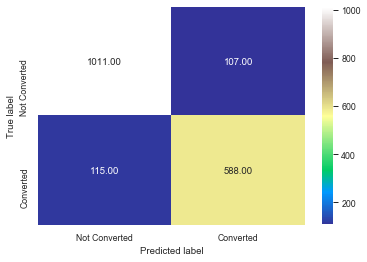

In [208]:
#Invoking the function

draw_cm( y_pred_final.Converted_IND, y_pred_final.final_predicted )

In [209]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

#### Sensitivity

In [210]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8364153627311522

#### Specificity

In [211]:
# Let us calculate specificity

TN / float(TN+FP)

0.9042933810375671

In [212]:
y_test=y_pred_final["Converted_IND"]
y_test

0       0
1       1
2       0
3       0
4       1
       ..
1816    1
1817    1
1818    1
1819    1
1820    0
Name: Converted_IND, Length: 1821, dtype: int64

### Precision and Recall

In [213]:
#Precision Value
print('Precision : ',confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1]))

#Recall Value
print('Recall : ',confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1]))

Precision :  0.8460431654676259
Recall :  0.8364153627311522


### ROC curve (Area Under Curve)

In [214]:
# Function to draw ROC Curve

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                             drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [215]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted_IND,
                                         y_pred_final.Converted_Prob, drop_intermediate=False)

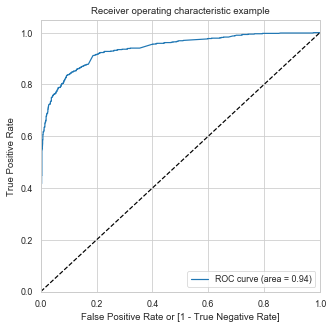

In [216]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final.Converted_IND, y_pred_final.Converted_Prob)

## Lead Scoring

In [217]:
y_pred_final

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,3504,0,0.010601,0
1,4050,1,0.999357,1
2,7201,0,0.496456,1
3,1196,0,0.004620,0
4,8219,1,0.144526,0
...,...,...,...,...
1816,643,1,0.040992,0
1817,7424,1,0.968648,1
1818,1529,1,0.604120,1
1819,7525,1,0.999357,1


In [218]:
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='lead_score',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
910,4297,1,0.995004,1,99
274,6170,1,0.995728,1,99
1398,8597,1,0.994699,1,99
1395,5692,1,0.997428,1,99
989,9169,1,0.992945,1,99
...,...,...,...,...,...
1461,550,0,0.003453,0,0
847,4870,0,0.005076,0,0
848,1303,0,0.008699,0,0
1679,4372,0,0.006776,0,0


### Lift & Gain Method for Maximizing the Conversion rate

In [219]:
sorted_predict_df = y_pred_final[['Converted_Prob',
                               'Converted_IND']].sort_values( 'Converted_Prob',
                                                      ascending = False )

sorted_predict_df

,Converted_Prob,Converted_IND
370,0.999946,1
1116,0.999934,1
250,0.999412,1
751,0.999357,1
1004,0.999357,1
...,...,...
807,0.001470,0
669,0.001400,0
271,0.001296,0
1488,0.001272,0


In [220]:
num_per_decile = int( len( sorted_predict_df ) / 10 )
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  182


In [221]:
def get_deciles( df ): 
    df['decile'] = 1
    idx = 0
    for each_d in range( 0, 10 ):
        df.iloc[idx:idx+num_per_decile, 
                df.columns.get_loc('decile')] = each_d,
        idx += num_per_decile
       
    df['decile'] = df['decile'] + 1 
    return df

In [222]:
deciles_predict_df = get_deciles( sorted_predict_df )
deciles_predict_df

,Converted_Prob,Converted_IND,decile
370,0.999946,1,1
1116,0.999934,1,1
250,0.999412,1,1
751,0.999357,1,1
1004,0.999357,1,1
...,...,...,...
807,0.001470,0,10
669,0.001400,0,10
271,0.001296,0,10
1488,0.001272,0,10


In [223]:
deciles_predict_df[0:10]

,Converted_Prob,Converted_IND,decile
370,0.999946,1,1
1116,0.999934,1,1
250,0.999412,1,1
751,0.999357,1,1
1004,0.999357,1,1
1597,0.999357,1,1
571,0.999357,1,1
579,0.999357,1,1
1041,0.999357,1,1
1579,0.999357,1,1


In [224]:
gain_lift_df = pd.DataFrame( 
    deciles_predict_df.groupby(
        'decile')['Converted_IND'].sum() ).reset_index() 
gain_lift_df.columns = ['decile', 'gain']

In [225]:
 gain_lift_df['gain_percentage'] = (100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

In [226]:
gain_lift_df

,decile,gain,gain_percentage
0,1,180,25.604552
1,2,180,51.209104
2,3,149,72.403983
3,4,88,84.921764
4,5,55,92.745377
5,6,12,94.452347
6,7,20,97.297297
7,8,9,98.577525
8,9,8,99.715505
9,10,2,100.000000


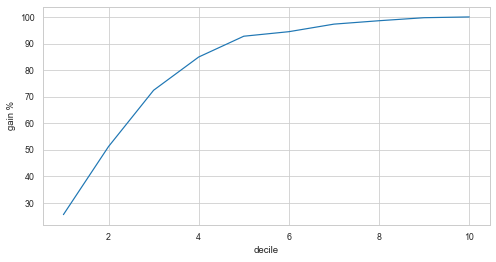

In [227]:
plt.figure( figsize = (8,4)) 
plt.plot( gain_lift_df['decile'],
         gain_lift_df['gain_percentage'], '-' ) 
plt.xlabel('decile')
plt.ylabel('gain %')
plt.show()

In [228]:
gain_lift_df['lift'] = ( gain_lift_df.gain_percentage / ( gain_lift_df.decile * 10) )
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,180,25.604552,2.560455
1,2,180,51.209104,2.560455
2,3,149,72.403983,2.413466
3,4,88,84.921764,2.123044
4,5,55,92.745377,1.854908
5,6,12,94.452347,1.574206
6,7,20,97.297297,1.389961
7,8,9,98.577525,1.232219
8,9,8,99.715505,1.107950
9,10,2,100.000000,1.000000


In [229]:
num_per_decile = int( len( sorted_predict_df ) / 10 )
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  182


## Top Features/Predictors

In [230]:
# Getting the parameters from final Model (Model 6)

pd.options.display.float_format = '{:.2f}'.format
final_parameters = logm6_model.params[1:]
final_parameters

Total Time Spent on Website                 0.95
Lead Origin_Lead Add Form                   4.46
Last Activity_Email Bounced                -2.03
Last Activity_Email Link Clicked           -0.78
Last Activity_Email Opened                 -0.66
Last Activity_Page Visited on Website      -0.95
Specialization_Travel and Tourism          -0.83
Tags_Interested in other courses           -2.44
Tags_Ringing                               -3.36
Tags_Will revert after reading the email    4.15
Last Notable Activity_Modified             -1.12
dtype: float64

In [231]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Total Time Spent on Website                 21.39
Lead Origin_Lead Add Form                  100.00
Last Activity_Email Bounced                -45.39
Last Activity_Email Link Clicked           -17.42
Last Activity_Email Opened                 -14.71
Last Activity_Page Visited on Website      -21.30
Specialization_Travel and Tourism          -18.70
Tags_Interested in other courses           -54.72
Tags_Ringing                               -75.32
Tags_Will revert after reading the email    92.91
Last Notable Activity_Modified             -24.99
dtype: float64

In [232]:
# Sorting the Predictor variables based on their relative coefficient values

top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
top_predictors_sort

Total Time Spent on Website                  8
Lead Origin_Lead Add Form                    7
Last Activity_Email Bounced                  2
Last Activity_Email Link Clicked            10
Last Activity_Email Opened                   5
Last Activity_Page Visited on Website        6
Specialization_Travel and Tourism            3
Tags_Interested in other courses             4
Tags_Ringing                                 0
Tags_Will revert after reading the email     9
Last Notable Activity_Modified               1
dtype: int64

<Figure size 864x576 with 0 Axes>

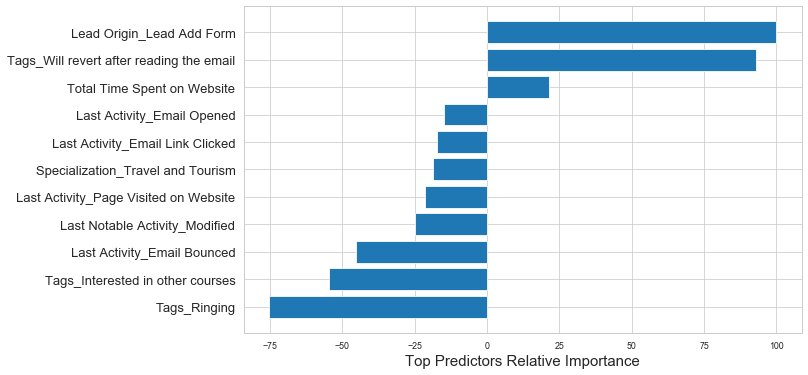

In [233]:
# Plotting the predictors based on their relative importance

%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col5].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

## Conclusion

    -~84% of Recall value indicates that our model is able to predict 84% of actual conversion cases correctly.
    -~85% of Precision value indicates that 85% of the conversions that our model predicted is actually converted.